In [1]:
# 기본 패키지 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
plt.style.use("seaborn")
sns.set(font_scale=1)
sns.set_style("whitegrid")

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 윈도우 OS 폰트 깨짐 방지 코드
from matplotlib import rc
import matplotlib as mpl
import matplotlib.font_manager as fm

rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

<ipython-input-1-1653d21a84f7>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
# # COLAB 폰트 깨짐 방지 코드
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# # 설치후 런타임 재시작 필수

# # matplotlib에 나눔고딕 폰트 적용
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm
# # 기본 폰트 설정
# plt.rc('font', family='NanumBarunGothic')
# # 깨짐방지 테스트
# plt.text(0.5, 0.5, '안녕하세요, 한글 폰트 테스트입니다!', ha='center', va='center', size=15)
# plt.show()

# 데이터 준비

## 데이터 불러오기

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 데이터 불러오기
paris_lists_raw = pd.read_csv('/content/drive/MyDrive/Weekly_project_TeamID/Data/Airbnb_Paris/listings.csv')
# paris_lists_summary_raw = pd.read_csv('../../../../../data_weekly/inside_airbnb/paris/listings_outline.csv')
# paris_neighbourhoods_raw = pd.read_csv('../../../../../data_weekly/inside_airbnb/paris/neighbourhoods.csv')
# paris_reviews_raw = pd.read_csv('../../../../../data_weekly/inside_airbnb/paris/reviews.csv')
# paris_reviews_summary_raw = pd.read_csv('../../../../../data_weekly/inside_airbnb/paris/reviews_outline.csv')

# 분석할 df 별도 복사
paris_lists = paris_lists_raw.copy()
# paris_reviews = paris_reviews_raw.copy()

# 출력
paris_lists.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20240316023852,2024-03-19,city scrape,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/miso/Hosting-...,3631,...,5.00,5.00,5.00,7511409139079,f,1,1,0,0,0.05
1,165409,https://www.airbnb.com/rooms/165409,20240316023852,2024-03-19,city scrape,studio charme Haut Marais PARIS,You'll love this typical parisian flat.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,788732,...,4.89,4.95,4.74,7510309597559,f,1,1,0,0,0.69
2,5396,https://www.airbnb.com/rooms/5396,20240316023852,2024-03-18,city scrape,Your perfect Paris studio on Île Saint-Louis,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,...,4.84,4.96,4.58,7510402838018,f,2,1,1,0,2.19
3,166370,https://www.airbnb.com/rooms/166370,20240316023852,2024-03-16,city scrape,Big appartment with view 4 people,"2 Bedrooms apartment for up to 4 people, with ...",The avenue is located nearby the animated dist...,https://a0.muscache.com/pictures/74224563/6c9e...,793032,...,4.79,4.65,4.48,7511007974397,f,1,1,0,0,0.51
4,39948,https://www.airbnb.com/rooms/39948,20240316023852,2024-03-19,previous scrape,COSY INDEPENDENT ROOM IN CENTRAL PARIS,Large newly-renovated guest room in central Pa...,"Located in the heart of Paris, The Montorgueil...",https://a0.muscache.com/pictures/f898fb0b-e72e...,171483,...,4.97,4.94,4.82,7510200734360,f,1,0,1,0,0.99


슈퍼호스트 선정 기준 날짜 년 4회(분기별)
- 1월 1일 / 4월 1일 / 7월 1일 / 10월 1일

## 분석에서 사용하지 않을 컬럼 삭제
- 추가한 컬럼 : description, host_has_profile_pic, host_identity_verified

In [5]:
# 1차 선별한 컬럼 25개 중 22개 2차 선별 + 1개(숙소_예약가능_여부)
# 최근 리뷰가 작성되었는지를 보기 위해 2개 컬럼 추가_240529 >> 'number_of_reviews_ltm' // 'last_review'
# 'listing_url' 컬럼 paris_lists에 적용_240530
# 240602_추가한 컬럼 : description, host_has_profile_pic, host_identity_verified


columns_selected = ['id', 'listing_url', 'description', 'host_id', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'property_type', \
    'room_type', 'accommodates', 'bedrooms', 'beds', 'amenities', 'price', 'has_availability', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'last_review', 'review_scores_rating', 'review_scores_accuracy', \
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']

# 'host_acceptance_rate', 'minimum_nights', 'maximum_nights', 'has_availability', 'host_total_listings_count', 'host_has_profile_pic', 'bathrooms',

# 선별한 컬럼만 적용
paris_lists = paris_lists[columns_selected]


# 변수 정리
paris_lists = paris_lists.rename(columns={
    'id': '숙소_id',
    'listing_url' : '숙소_url',
    'description' : '숙소_설명',
    'host_id': '호스트_id',
    'host_response_time': '답변_평균시간',
    'host_response_rate': '문의_응답률',
    # 'host_acceptance_rate': '예약_수락률',
    'host_is_superhost': '슈퍼호스트',
    # 'host_total_listings_count': '숙소_수',
    'host_has_profile_pic' : '프로필_사진',
    'host_identity_verified' : '호스트_신원',
    'neighbourhood_cleansed': '숙소_지역',
    'property_type' : '숙소_특징',
    'room_type': '숙소_유형',
    'accommodates': '수용_인원수',
    # 'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    # 'minimum_nights': '최소_숙박일',
    # 'maximum_nights': '최대_숙박일',
    'has_availability' : '예약_가능여부',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_ltm' : '12개월_리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'last_review' : '마지막_리뷰',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수'

})

# 컬럼명 확인
paris_lists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84397 entries, 0 to 84396
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        84397 non-null  int64  
 1   숙소_url       84397 non-null  object 
 2   숙소_설명        80894 non-null  object 
 3   호스트_id       84397 non-null  int64  
 4   답변_평균시간      48310 non-null  object 
 5   문의_응답률       48310 non-null  object 
 6   슈퍼호스트        84306 non-null  object 
 7   프로필_사진       84390 non-null  object 
 8   호스트_신원       84390 non-null  object 
 9   숙소_지역        84397 non-null  object 
 10  숙소_특징        84397 non-null  object 
 11  숙소_유형        84397 non-null  object 
 12  수용_인원수       84397 non-null  int64  
 13  침실수          77480 non-null  float64
 14  침대수          60828 non-null  float64
 15  편의시설         84397 non-null  object 
 16  숙소_가격        60917 non-null  object 
 17  예약_가능여부      79888 non-null  object 
 18  리뷰수          84397 non-null  int64  
 19  12개월

## 데이터 전처리

### 결측치 처리
- 숙소 유형  >> 모든 데이터 사용
- (이외 상세 내용은 가격_관계분석_런던2.ipynb확인요망)

In [6]:
print(f'런던 데이터 전체 개수: {paris_lists.shape[0]}개')
print("-" * 60)

# 리뷰수가 0인 데이터 제거
condition_review_0 = paris_lists['리뷰수'] == 0
paris_lists = paris_lists[~condition_review_0]
print(f'리뷰가 0인 데이터 제거 후 데이터 개수: {paris_lists.shape[0]}개')
print("-" * 60)

# 카테고리 타입 데이터 비율 및 개수 세는 함수 선언
def CategoricalData_Count_Ratio(name_of_dataframe, name_of_column):

    print(f'전체 숙소 개수: {name_of_dataframe.shape[0]}개')
    print()

    type_list = name_of_dataframe[name_of_column].unique().tolist()

    for type in type_list:
        condition_type = name_of_dataframe[name_of_column] == type
        ratio_type = round((name_of_dataframe[condition_type].shape[0] / name_of_dataframe.shape[0]) * 100, 2)
        print(f'{name_of_column}이 {type}인 숙소의 개수: {name_of_dataframe[condition_type].shape[0]}개')
        print(f'{name_of_column}이 {type}인 숙소의 비율 : {ratio_type}%')
        print()


# # 숙소 유형 [Entire home/apt & Private room] 데이터만 선별
# condition_room_entirehomeapt = paris_lists['숙소_유형'] == 'Entire home/apt'
# condition_room_privateroom = paris_lists['숙소_유형'] == 'Private room'
# paris_lists = paris_lists[(condition_room_entirehomeapt | condition_room_privateroom)]
# print('[Entire home/apt / Private room] 데이터만 선별 : ')
# CategoricalData_Count_Ratio(paris_lists, '숙소_유형')
# print("-" * 60)

# 예약_가능여부 Null값 제거 및 예약 불가능 숙소 제거
paris_lists = paris_lists[paris_lists["예약_가능여부"].notnull()]
condition_availability_f = paris_lists['예약_가능여부'] == 'f'
paris_lists = paris_lists[~condition_availability_f]
print(f'Null값 제거 및 예약 불가능 숙소 제거 후 데이터 개수: {paris_lists.shape[0]}개')
print("-" * 60)

# 숙소 가격 타입 변환 >> float
paris_lists['숙소_가격'] = paris_lists['숙소_가격'].str.lstrip('$').str.replace(',', '').astype('float')

# 가격 null값 제거
condition_price_notnull = paris_lists['숙소_가격'].notnull()
paris_lists = paris_lists[condition_price_notnull]
print(f'가격 Null값 제거 후 데이터 개수: {paris_lists.shape[0]}개')
print("-" * 60)

# 슈퍼호스트 결측치 제거
paris_lists = paris_lists.dropna(subset=['슈퍼호스트'])
print(f'슈퍼호스트 Null값 제거 후 데이터 개수: {paris_lists.shape[0]}개')
print("-" * 60)


# 침대수, 침실수 결측치 제거
paris_lists = paris_lists.dropna(subset=['침실수', '침대수'])
print(f'침실수, 침대수 Null값 제거 후 데이터 개수: {paris_lists.shape[0]}개')
print("-" * 60)


# 각 리뷰 점수 컬럼 Null 값 제거
type_review_null_any = paris_lists[['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']].isnull().any(axis=1)
paris_lists = paris_lists[~type_review_null_any]
print(f'각 리뷰점수 Null값 제거 후 데이터 개수: {paris_lists.shape[0]}개')
print("-" * 60)

런던 데이터 전체 개수: 84397개
------------------------------------------------------------
리뷰가 0인 데이터 제거 후 데이터 개수: 58821개
------------------------------------------------------------
Null값 제거 및 예약 불가능 숙소 제거 후 데이터 개수: 57478개
------------------------------------------------------------
가격 Null값 제거 후 데이터 개수: 41763개
------------------------------------------------------------
슈퍼호스트 Null값 제거 후 데이터 개수: 41704개
------------------------------------------------------------
침실수, 침대수 Null값 제거 후 데이터 개수: 41578개
------------------------------------------------------------
각 리뷰점수 Null값 제거 후 데이터 개수: 41549개
------------------------------------------------------------


### 이상치 처리
- 기존 전처리에서 각 숙소_유형 별 상위 10개(개수) 선별하지 않음 >> 모든 데이터 사용
- 욕실수, 침실수, 침대수 이상치 처리도 다 해버리자~ (스케일러 사용 관련)
- (이외 이상치 처리 상세 내용은 가격_관계분석_런던2.ipynb확인요망)

In [7]:
# # 각 숙소_유형 별 상위 10개(개수) 숙소_특징 데이터만 선별
# # 조건 생성
# sorted_PrivateRoom = paris_lists.groupby(['숙소_유형', '숙소_특징']).size().reset_index(name='count').sort_values(by=['숙소_유형', 'count'], ascending=False, ignore_index=True)[:28].reset_index(drop=True)
# sorted_EntireHomeApt = paris_lists.groupby(['숙소_유형', '숙소_특징']).size().reset_index(name='count').sort_values(by=['숙소_유형', 'count'], ascending=False, ignore_index=True)[28:].reset_index(drop=True)
# sorted_PrivateRoom_top10 = sorted_PrivateRoom['숙소_특징'][:10].values
# sorted_EntireHomeApt_top10 = sorted_EntireHomeApt['숙소_특징'][:10].values
# condition_PrivateRoom_top10 = paris_lists['숙소_특징'].isin(sorted_PrivateRoom_top10)
# condition_EntireHomeApt_top10 = paris_lists['숙소_특징'].isin(sorted_EntireHomeApt_top10)
# # 데이터 제거
# paris_lists = paris_lists[(condition_PrivateRoom_top10 | condition_EntireHomeApt_top10)]
# print(f'숙소_유형별 숙소_특징 상위 10개씩 20개 선별 후 데이터 개수: {paris_lists.shape[0]}개')
# print("-" * 60)


# 12개월_리뷰수가 0인 경우 제거
condition_reviewforyear_0 = paris_lists['12개월_리뷰수'] == 0
paris_lists = paris_lists[~condition_reviewforyear_0]
print(f'12개월_리뷰수가 0인 데이터 제거 후 데이터 개수: {paris_lists.shape[0]}개')
print("-" * 60)


# 수용인원수 이상치 처리 (숙소 유형별 처리)
accommodates_type_list = paris_lists['숙소_유형'].unique().tolist()

def delete_outlier_IQR_InnerFence(column_name):
    # 전역 변수 선언
    global paris_lists
    # 숙소 유형별 Inner Fencs Out Lier 제거
    for type in accommodates_type_list:
        condition_room_type = paris_lists['숙소_유형'] == type
        Q1 = paris_lists[column_name][condition_room_type].quantile(.25)
        Q3 = paris_lists[column_name][condition_room_type].quantile(.75)
        IQR = Q3 - Q1
        condition_accommodates_upper_outliers = paris_lists[column_name][condition_room_type] > (Q3 + IQR * 1.5)
        accommodates_upper_outliers = paris_lists[condition_room_type][condition_accommodates_upper_outliers]
        upper_outlier_indices = accommodates_upper_outliers.index
        paris_lists = paris_lists.drop(index=upper_outlier_indices)
        print(f'{type} 데이터 중 {column_name} Upper_outlier 제거 후 데이터 개수 : {paris_lists.shape[0]}개')

delete_outlier_IQR_InnerFence('수용_인원수')
print("-" * 60)

# 침실수 이상치 처리
delete_outlier_IQR_InnerFence('침실수')
print("-" * 60)

# 침대수 이상치 처리
delete_outlier_IQR_InnerFence('침대수')
print("-" * 60)


# 가격 이상치 처리 (숙소 유형별 처리)

accommodates_type_list = paris_lists['숙소_유형'].unique().tolist()

def delete_outlier_IQR_OuterFence(column_name):
    # 전역 변수 선언
    global paris_lists
    # 숙소 유형별 Outer Fencs Out Lier 제거
    for type in accommodates_type_list:
        condition_room_type = paris_lists['숙소_유형'] == type
        Q1 = paris_lists[column_name][condition_room_type].quantile(.25)
        Q3 = paris_lists[column_name][condition_room_type].quantile(.75)
        IQR = Q3 - Q1
        condition_accommodates_upper_outliers = paris_lists[column_name][condition_room_type] > (Q3 + IQR * 3)
        accommodates_upper_outliers = paris_lists[condition_room_type][condition_accommodates_upper_outliers]
        upper_outlier_indices = accommodates_upper_outliers.index
        paris_lists = paris_lists.drop(index=upper_outlier_indices)
        print(f'{type} 데이터 중 {column_name} Upper_outlier 제거 후 데이터 개수 : {paris_lists.shape[0]}개')

delete_outlier_IQR_OuterFence('숙소_가격')
print("-" * 60)

# 가격이 0원인 숙소 제거
condition_price_0 = paris_lists['숙소_가격'] == 0
paris_lists = paris_lists[~condition_price_0]
print(f'"숙소_가격"이 0원인 데이터 제거 후 데이터 개수 : {paris_lists.shape[0]}개')

12개월_리뷰수가 0인 데이터 제거 후 데이터 개수: 36980개
------------------------------------------------------------
Entire home/apt 데이터 중 수용_인원수 Upper_outlier 제거 후 데이터 개수 : 35834개
Private room 데이터 중 수용_인원수 Upper_outlier 제거 후 데이터 개수 : 35306개
Shared room 데이터 중 수용_인원수 Upper_outlier 제거 후 데이터 개수 : 35283개
Hotel room 데이터 중 수용_인원수 Upper_outlier 제거 후 데이터 개수 : 35227개
------------------------------------------------------------
Entire home/apt 데이터 중 침실수 Upper_outlier 제거 후 데이터 개수 : 35015개
Private room 데이터 중 침실수 Upper_outlier 제거 후 데이터 개수 : 34960개
Shared room 데이터 중 침실수 Upper_outlier 제거 후 데이터 개수 : 34960개
Hotel room 데이터 중 침실수 Upper_outlier 제거 후 데이터 개수 : 34958개
------------------------------------------------------------
Entire home/apt 데이터 중 침대수 Upper_outlier 제거 후 데이터 개수 : 33389개
Private room 데이터 중 침대수 Upper_outlier 제거 후 데이터 개수 : 33181개
Shared room 데이터 중 침대수 Upper_outlier 제거 후 데이터 개수 : 33146개
Hotel room 데이터 중 침대수 Upper_outlier 제거 후 데이터 개수 : 33133개
------------------------------------------------------------
Entire home

### 컬럼 데이터 타입 정리

In [8]:
# 호스트_신원 / 프로필_사진 / 답변_평균시간 / 문의_응답률 컬럼 다시 확인
new_column_list = ['호스트_신원', '프로필_사진', '답변_평균시간', '문의_응답률']
for new_column in new_column_list:
    print(f'{new_column}의 UNIQUE값:')
    print(paris_lists[new_column].unique())
    print(f'{new_column}의 UNIQUE값의 개수: {paris_lists[new_column].nunique()}')
    print('-' * 50)

호스트_신원의 UNIQUE값:
['t' 'f']
호스트_신원의 UNIQUE값의 개수: 2
--------------------------------------------------
프로필_사진의 UNIQUE값:
['t' 'f']
프로필_사진의 UNIQUE값의 개수: 2
--------------------------------------------------
답변_평균시간의 UNIQUE값:
['within a few hours' 'within an hour' nan 'within a day'
 'a few days or more']
답변_평균시간의 UNIQUE값의 개수: 4
--------------------------------------------------
문의_응답률의 UNIQUE값:
['100%' nan '93%' '70%' '86%' '90%' '80%' '50%' '0%' '39%' '91%' '98%'
 '71%' '72%' '67%' '92%' '77%' '75%' '83%' '40%' '63%' '84%' '78%' '14%'
 '82%' '88%' '60%' '33%' '87%' '62%' '11%' '20%' '94%' '96%' '44%' '97%'
 '43%' '69%' '89%' '81%' '55%' '99%' '95%' '29%' '30%' '25%' '79%' '18%'
 '10%' '85%' '57%' '73%' '3%' '17%' '8%' '56%' '31%' '23%' '52%' '13%'
 '19%' '64%' '36%' '38%' '61%' '59%' '54%' '27%' '76%' '7%' '65%' '35%'
 '6%' '51%' '9%' '15%' '22%' '58%' '34%' '47%' '46%' '53%' '68%' '42%'
 '37%' '12%' '28%' '26%' '45%' '48%' '74%']
문의_응답률의 UNIQUE값의 개수: 90
-----------------------------------

In [9]:
# 컬럼 데이터 타입 변환

# ID => 문자로 변환
paris_lists['숙소_id'] = paris_lists['숙소_id'].astype('str')
paris_lists['호스트_id'] = paris_lists['호스트_id'].astype('str')

# 숙소_지역, 숙소_특징, 숙소_유형 >> 범주형 데이터로 변환
for column in ['슈퍼호스트', '숙소_지역', '숙소_특징', '숙소_유형', '호스트_신원', '프로필_사진', '답변_평균시간']:
    paris_lists[column] = paris_lists[column].astype('category')

### 추가 컬럼 결측치 처리 및 전처리

In [10]:
# 숙소_설명 null값 제거
condition_description_notnull = paris_lists['숙소_설명'].notnull()
paris_lists = paris_lists[condition_description_notnull]
print(f'숙소_설명 Null값 제거 후 데이터 개수: {paris_lists.shape[0]}개')
print("-" * 60)

# 답변_평균시간 null값 제거 & 문의_응답률 Null값과 답변_평균시간 null값 동일
condition_responsetime_notnull = paris_lists['답변_평균시간'].notnull()
paris_lists = paris_lists[condition_responsetime_notnull]
print(f'답변_평균시간 & 문의_응답률 Null값 제거 후 데이터 개수: {paris_lists.shape[0]}개')
print("-" * 60)

# 문의_응답률 타입 변환 >> float
paris_lists['문의_응답률'] = paris_lists['문의_응답률'].str.rstrip('%').astype('float')

숙소_설명 Null값 제거 후 데이터 개수: 31727개
------------------------------------------------------------
답변_평균시간 & 문의_응답률 Null값 제거 후 데이터 개수: 26591개
------------------------------------------------------------


In [11]:
# 문의_응답률이 0인 경우
condition_responserate_0 = paris_lists['문의_응답률'] == 0
print(f"문의_응답률이 0%인 숙소의 개수: {paris_lists[condition_responserate_0].shape[0]}개")
paris_lists = paris_lists[~condition_responserate_0]
print(f"문의_응답률이 0%인 숙소 제거 후 데이터 개수: {paris_lists.shape[0]}개")

문의_응답률이 0%인 숙소의 개수: 362개
문의_응답률이 0%인 숙소 제거 후 데이터 개수: 26229개


### 파생변수 생성 및 전처리

#### 편의시설_개수

In [12]:
# 편의시설_개수 파생변수 생성
paris_lists['편의시설_개수'] = paris_lists['편의시설'].apply(lambda x: len(eval(x)))

# 편의시설 데이터값 리스트화
paris_lists['편의시설'] = paris_lists['편의시설'].apply(lambda x: eval(x))

In [13]:
# 이상치 처리
delete_outlier_IQR_InnerFence('편의시설_개수')
print("-" * 60)

Entire home/apt 데이터 중 편의시설_개수 Upper_outlier 제거 후 데이터 개수 : 26174개
Private room 데이터 중 편의시설_개수 Upper_outlier 제거 후 데이터 개수 : 26169개
Hotel room 데이터 중 편의시설_개수 Upper_outlier 제거 후 데이터 개수 : 26168개
Shared room 데이터 중 편의시설_개수 Upper_outlier 제거 후 데이터 개수 : 26167개
------------------------------------------------------------


#### 숙소_설명_글자수

In [14]:
from bs4 import BeautifulSoup
import re

def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_non_alphanumeric(text):
    return re.sub(r'[^A-Za-z0-9 ]+', '', text)

# HTML 태그 제거
paris_lists['숙소_설명'] = paris_lists['숙소_설명'].apply(remove_html_tags)

# # 텍스트 외의 형식 제거
# paris_lists['cleaned_description'] = paris_lists['cleaned_description'].apply(remove_non_alphanumeric)

# 글자 수 세기
paris_lists['숙소_설명_글자수'] = paris_lists['숙소_설명'].apply(len)

# 출력
paris_lists[['숙소_설명', '숙소_설명_글자수']].head()

<ipython-input-14-cfd4694b5571>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,숙소_설명,숙소_설명_글자수
1,You'll love this typical parisian flat.,39
2,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...",306
6,"VERY CONVENIENT, WITH THE BEST LOCATION !",41
8,Bonjour :-)This apartment of 50 m2 is the plac...,346
9,"A local neighbourhood filled with history, res...",225


In [15]:
# 이상치 처리

delete_outlier_IQR_InnerFence('숙소_설명_글자수')
print("-" * 60)

Entire home/apt 데이터 중 숙소_설명_글자수 Upper_outlier 제거 후 데이터 개수 : 26132개
Private room 데이터 중 숙소_설명_글자수 Upper_outlier 제거 후 데이터 개수 : 26131개
Hotel room 데이터 중 숙소_설명_글자수 Upper_outlier 제거 후 데이터 개수 : 26131개
Shared room 데이터 중 숙소_설명_글자수 Upper_outlier 제거 후 데이터 개수 : 26128개
------------------------------------------------------------


# EDA_탐색적 데이터 분석

In [16]:
# 인덱스 정리
paris_lists.reset_index(drop=True, inplace=True)
paris_lists[:10]

,숙소_id,숙소_url,숙소_설명,호스트_id,답변_평균시간,문의_응답률,슈퍼호스트,프로필_사진,호스트_신원,숙소_지역,...,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,편의시설_개수,숙소_설명_글자수
0,165409,https://www.airbnb.com/rooms/165409,You'll love this typical parisian flat.,788732,within a few hours,100.0,t,t,t,Temple,...,4.68,4.72,4.59,4.87,4.89,4.95,4.74,0.69,23,39
1,5396,https://www.airbnb.com/rooms/5396,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...",7903,within an hour,100.0,f,t,t,Hôtel-de-Ville,...,4.60,4.63,4.57,4.81,4.84,4.96,4.58,2.19,37,306
2,7397,https://www.airbnb.com/rooms/7397,"VERY CONVENIENT, WITH THE BEST LOCATION !",2626,within an hour,100.0,t,t,t,Hôtel-de-Ville,...,4.73,4.80,4.45,4.91,4.88,4.93,4.73,2.21,25,41
3,41106,https://www.airbnb.com/rooms/41106,Bonjour :-)This apartment of 50 m2 is the plac...,177387,within an hour,100.0,t,t,t,Hôtel-de-Ville,...,4.76,4.81,4.65,4.70,4.94,4.96,4.69,0.67,53,346
4,167998,https://www.airbnb.com/rooms/167998,"A local neighbourhood filled with history, res...",469865,within a few hours,93.0,f,t,t,Louvre,...,4.72,4.77,4.51,4.87,4.86,4.98,4.53,1.19,49,225
5,43055,https://www.airbnb.com/rooms/43055,Perfect location to discover Paris!Small studi...,187863,within a few hours,100.0,t,t,t,Hôtel-de-Ville,...,4.53,4.28,4.73,4.71,4.69,4.95,4.61,1.25,32,140
6,168695,https://www.airbnb.com/rooms/168695,Completely renovated studio in a safe and conv...,804158,within an hour,100.0,f,t,t,Passy,...,4.88,4.54,4.74,4.83,4.88,4.88,4.74,0.20,39,379
7,171159,https://www.airbnb.com/rooms/171159,"Nice studio, 15 m2, ideal for two people or a ...",193142,within an hour,100.0,f,t,t,Élysée,...,4.32,4.54,4.20,4.65,4.84,4.65,4.40,3.00,0,223
8,175338,https://www.airbnb.com/rooms/175338,"Great 1 bedroom appartement, close to many bar...",738410,within an hour,100.0,f,t,t,Vaugirard,...,4.86,4.86,4.73,4.95,4.94,4.95,4.83,0.45,38,171
9,44130,https://www.airbnb.com/rooms/44130,"In a beautiful renovated listed building, cosy...",152242,within a day,70.0,f,t,t,Hôtel-de-Ville,...,4.29,4.48,4.07,4.48,4.47,4.88,4.16,0.59,42,258


## 분석 기준(파생변수) 생성
- 게스트_선호
- 숙소_등급

### 리뷰점수 상하위 10% 조회

In [17]:
import plotly.express as px
import plotly.graph_objs as go


# '리뷰점수' 데이터 분포를 시각화
fig = px.histogram(paris_lists, x='리뷰점수', nbins=50, title='리뷰점수 분포')
fig.update_layout(bargap=0.2,
                  width=800, # 그래프 크기 조정
                  height=500,
                  xaxis_title='리뷰점수',
                  yaxis_title='빈도')
fig.show()

In [18]:
# 상위 10%와 하위 10%를 나누기 위한 경계값 계산
lower_quartile = paris_lists['리뷰점수'].quantile(0.10)
upper_quartile = paris_lists['리뷰점수'].quantile(0.90)

# 파생변수 추가: '리뷰점수_등급'
def review_grade(score):
    if score <= lower_quartile:
        return 'Low'
    elif score >= upper_quartile:
        return 'Top'
    else:
        return 'Middle'

paris_lists['리뷰점수_등급'] = paris_lists['리뷰점수'].apply(review_grade)

# 결과 확인
print(paris_lists[['리뷰점수', '리뷰점수_등급']].head())


   리뷰점수 리뷰점수_등급
0  4.68  Middle
1  4.60  Middle
2  4.73  Middle
3  4.76  Middle
4  4.72  Middle


In [19]:
# 리뷰점수_등급 카테고리 변환
paris_lists['리뷰점수_등급'] = paris_lists['리뷰점수_등급'].astype('category')

# 리뷰점수_등급 별 '리뷰점수' 기초 통계 확인
리뷰등급별_리뷰점수 = \
paris_lists.groupby('리뷰점수_등급')['리뷰점수'].agg(
    count='size',
    mean='mean',
    std='std',
    min='min',
    max='max',
    median='median'
).reset_index().sort_values(by= 'count', ascending=False).reset_index(drop=True)

리뷰등급별_리뷰점수

,리뷰점수_등급,count,mean,std,min,max,median
0,Middle,16300,4.751246,0.156140,4.37,4.99,4.78
1,Top,7151,5.000000,0.000000,5.00,5.00,5.00
2,Low,2677,3.914710,0.611794,1.00,4.36,4.10


In [20]:
# 리뷰점수_등급 별 '리뷰수' 기초 통계 확인
리뷰등급별_리뷰수 = \
paris_lists.groupby('리뷰점수_등급')['리뷰수'].agg(
    count='size',
    mean='mean',
    std='std',
    min='min',
    max='max',
    median='median'
).reset_index().sort_values(by= 'count', ascending=False).reset_index(drop=True)

리뷰등급별_리뷰수

,리뷰점수_등급,count,mean,std,min,max,median
0,Middle,16300,56.173190,85.157067,1,2905,29.0
1,Top,7151,6.381625,8.819793,1,183,3.0
2,Low,2677,23.682854,61.095993,1,2049,7.0


1. 리뷰점수 만으로는 에어비앤비에서 이야기하는 상위 10% 숙소를 추려낼 수 없음
2. 게스트 선호 숙소 기준을 가져와서 좀 더 추려야할 듯

### 게스트_선호

In [21]:
# 최근 2년간 리뷰가 5개 이상인 조건 설정
# 1) 마지막 리뷰가 '2022-04-01' 이후인 데이터 조건
paris_lists['마지막_리뷰'] = pd.to_datetime(paris_lists['마지막_리뷰'])
start_date = '2022-04-01'
condition_lastreview_guestfavorite = paris_lists['마지막_리뷰'] >= start_date

# 2) 12개월 간 리뷰수가 0이 아닌 데이터 조건
condition_reviewforyear = paris_lists['12개월_리뷰수'] != 0

# 3) 전체 리뷰수가 5 이상인 데이터 조건
condition_review_5 = paris_lists['리뷰수'] >= 5

# 리뷰 점수가 4.9 이상인 데이터 조건
condition_score_guestfavorite = paris_lists['리뷰점수'] >= 4.9

# 슈퍼호스트인 데이터
condition_superhost = paris_lists['슈퍼호스트'] == 't'

print(f'슈퍼호스트 조건까지 집어넣은 게스트_선호 데이터 개수 :{paris_lists[condition_lastreview_guestfavorite & condition_reviewforyear & condition_review_5 & condition_score_guestfavorite & condition_superhost].shape[0]}개')
print(f'슈퍼호스트 조건은 제외한 게스트_선호 데이터 개수 :{paris_lists[condition_lastreview_guestfavorite & condition_reviewforyear & condition_review_5 & condition_score_guestfavorite].shape[0]}개')

슈퍼호스트 조건까지 집어넣은 게스트_선호 데이터 개수 :3707개
슈퍼호스트 조건은 제외한 게스트_선호 데이터 개수 :6232개


In [22]:
# 파생변수 생성
paris_lists['게스트_선호'] = 'f'

# 슈퍼호스트 조건 포함
paris_lists.loc[
    condition_lastreview_guestfavorite &
    condition_reviewforyear &
    condition_review_5 &
    condition_score_guestfavorite &
    condition_superhost, '게스트_선호'] = 't'

# # 슈퍼호스트 조건을 포함하지 않는 게스트 선호 숙소
# paris_lists.loc[
#     condition_lastreview_guestfavorite &
#     condition_reviewforyear &
#     condition_review_5 &
#     condition_score_guestfavorite &
#     ~condition_superhost, '게스트_선호'] = 'm'

# 기초 통계량 조회

# 게스트_선호 카테고리 변환
paris_lists['게스트_선호'] = paris_lists['게스트_선호'].astype('category')

# 게스트_선호 별 '리뷰점수' 기초 통계 확인
게스트선호별_리뷰점수 = \
paris_lists.groupby('게스트_선호')['리뷰점수'].agg(
    count='size',
    mean='mean',
    std='std',
    min='min',
    max='max',
    median='median'
).reset_index().sort_values(by= 'count', ascending=False).reset_index(drop=True)

게스트선호별_리뷰점수


,게스트_선호,count,mean,std,min,max,median
0,f,22421,4.696491,0.394200,1.0,5.0,4.80
1,t,3707,4.958176,0.036459,4.9,5.0,4.96


In [23]:
# 게스트_선호 별 '리뷰점수' 기초 통계 확인
게스트선호별_리뷰수 = \
paris_lists.groupby('게스트_선호')['리뷰수'].agg(
    count='size',
    mean='mean',
    std='std',
    min='min',
    max='max',
    median='median'
).reset_index().sort_values(by= 'count', ascending=False).reset_index(drop=True)

게스트선호별_리뷰수

,게스트_선호,count,mean,std,min,max,median
0,f,22421,37.945319,75.512856,1,2905,13.0
1,t,3707,46.907203,60.766346,5,699,26.0


In [24]:
# 게스트 선호 숙소 중 리뷰가 5.0인 숙소 개수 확인

# 조건 설정
condition_guestfavorite_t = paris_lists['게스트_선호'] == 't'
condition_score_5 = paris_lists['리뷰점수'] == 5.0

# 개수 출력
print(f'게스트 선호 숙소 중 리뷰가 5.0인 숙소 개수 : {paris_lists[condition_guestfavorite_t & condition_score_5].shape[0]}개')

게스트 선호 숙소 중 리뷰가 5.0인 숙소 개수 : 1294개


### 숙소_등급

- 상위 10% 기준 : 게스트 선호 숙소 T
- 하위 10% 기준 : 리뷰 등급 하위 10%
- 우선 비교를 통해 유의미한 값이 나오는지 확인하는 것을 목표로 함

In [25]:
# 하위 10%를 나누기 위한 경계값 계산
lower_quartile = paris_lists['리뷰점수'].quantile(0.10)

# 파생변수 추가: '숙소_등급'
def review_grade(score):
    if score <= lower_quartile:
        return 'Low'
    else:
        return 'Middle'

paris_lists['숙소_등급'] = paris_lists['리뷰점수'].apply(review_grade)

# 상위 10% 값 추가 : 게스트 선호 숙소 == t
paris_lists.loc[
    condition_lastreview_guestfavorite &
    condition_reviewforyear &
    condition_review_5 &
    condition_score_guestfavorite &
    condition_superhost, '숙소_등급'] = 'Top'

# 컬럼 제거
paris_lists.drop(columns='리뷰점수_등급', inplace=True)

# 결과 확인
숙소등급별_리뷰점수 = \
paris_lists.groupby('숙소_등급')['리뷰점수'].agg(
    count='size',
    mean='mean',
    std='std',
    min='min',
    max='max',
    median='median'
).reset_index().sort_values(by= 'count', ascending=False).reset_index(drop=True)

숙소등급별_리뷰점수

,숙소_등급,count,mean,std,min,max,median
0,Middle,19744,4.802489,0.177831,4.37,5.00,4.83
1,Top,3707,4.958176,0.036459,4.90,5.00,4.96
2,Low,2677,3.914710,0.611794,1.00,4.36,4.10


In [26]:
# paris_lists.to_csv('../Data/paris_lists_preprocessed.csv')

In [27]:
# Top과 Low의 비교를 위한 별도의 DF 생성

paris_toplow = paris_lists[paris_lists['숙소_등급'].isin(['Top', 'Low'])]
paris_toplow[:10]

,숙소_id,숙소_url,숙소_설명,호스트_id,답변_평균시간,문의_응답률,슈퍼호스트,프로필_사진,호스트_신원,숙소_지역,...,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,편의시설_개수,숙소_설명_글자수,게스트_선호,숙소_등급
7,171159,https://www.airbnb.com/rooms/171159,"Nice studio, 15 m2, ideal for two people or a ...",193142,within an hour,100.0,f,t,t,Élysée,...,4.20,4.65,4.84,4.65,4.40,3.00,0,223,f,Low
9,44130,https://www.airbnb.com/rooms/44130,"In a beautiful renovated listed building, cosy...",152242,within a day,70.0,f,t,t,Hôtel-de-Ville,...,4.07,4.48,4.47,4.88,4.16,0.59,42,258,f,Low
11,45661,https://www.airbnb.com/rooms/45661,- Located in the very center of Paris- Cleanli...,202918,within a few hours,86.0,f,t,t,Bourse,...,4.18,4.27,4.57,4.73,4.33,0.87,12,257,f,Low
13,9952,https://www.airbnb.com/rooms/9952,"I am a retired lady, who offers a nice little ...",33534,within a few hours,100.0,t,t,t,Popincourt,...,4.88,4.98,4.86,4.88,4.90,0.37,37,317,t,Top
17,48498,https://www.airbnb.com/rooms/48498,Right in the middle area of the street Saint H...,152242,within a day,70.0,f,t,t,Louvre,...,4.32,4.47,4.42,4.95,4.18,0.25,36,219,f,Low
21,195564,https://www.airbnb.com/rooms/195564,Charming apartement in the 13rd district of Pa...,938912,within a few hours,100.0,t,t,t,Gobelins,...,4.80,4.98,5.00,4.83,4.83,0.47,56,51,t,Top
22,200845,https://www.airbnb.com/rooms/200845,Beautiful studio in the heart of the 16th and ...,982391,within a day,100.0,f,t,t,Passy,...,4.12,4.57,4.64,4.88,4.31,1.12,21,226,f,Low
23,54377,https://www.airbnb.com/rooms/54377,We love Paris. Giving tourists the opportunity...,247562,within a day,100.0,t,t,t,Buttes-Montmartre,...,4.73,4.98,5.00,4.53,4.88,1.30,29,353,t,Top
24,55348,https://www.airbnb.com/rooms/55348,Lovely studio apartment - Totally renovated in...,261355,within an hour,100.0,t,t,t,Hôtel-de-Ville,...,4.95,4.91,4.94,4.98,4.85,0.93,28,389,t,Top
26,58569,https://www.airbnb.com/rooms/58569,Well fittedrefurbished apartment with bathroom...,280433,within a day,80.0,f,t,t,Entrepôt,...,4.00,5.00,5.00,5.00,4.00,0.21,26,100,f,Low


## 컬럼 간 관계 분석

In [28]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 라벨 인코딩 적용
paris_toplow['숙소등급_인코딩'] = label_encoder.fit_transform(paris_toplow['숙소_등급'])
paris_lists['게스트선호_인코딩'] = label_encoder.fit_transform(paris_lists['게스트_선호'])

# 변환된 데이터 확인
print(paris_toplow[['숙소_등급', '숙소등급_인코딩']].head())
print(paris_lists[['게스트_선호', '게스트선호_인코딩']].head())

   숙소_등급  숙소등급_인코딩
7    Low         0
9    Low         0
11   Low         0
13   Top         1
17   Low         0
  게스트_선호  게스트선호_인코딩
0      f          0
1      f          0
2      f          0
3      f          0
4      f          0


<ipython-input-28-dda4a7f2a733>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 상관계수 / 히트맵


#### 피어슨 상관계수
- 두 변수 간의 선형 상관관계를 측정 (수치를 수치로 보느냐)

In [29]:
paris_lists.columns

Index(['숙소_id', '숙소_url', '숙소_설명', '호스트_id', '답변_평균시간', '문의_응답률', '슈퍼호스트',
       '프로필_사진', '호스트_신원', '숙소_지역', '숙소_특징', '숙소_유형', '수용_인원수', '침실수', '침대수',
       '편의시설', '숙소_가격', '예약_가능여부', '리뷰수', '12개월_리뷰수', '30일_리뷰수', '마지막_리뷰',
       '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수',
       '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수', '편의시설_개수', '숙소_설명_글자수', '게스트_선호',
       '숙소_등급', '게스트선호_인코딩'],
      dtype='object')

In [30]:
paris_lists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26128 entries, 0 to 26127
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   숙소_id        26128 non-null  object        
 1   숙소_url       26128 non-null  object        
 2   숙소_설명        26128 non-null  object        
 3   호스트_id       26128 non-null  object        
 4   답변_평균시간      26128 non-null  category      
 5   문의_응답률       26128 non-null  float64       
 6   슈퍼호스트        26128 non-null  category      
 7   프로필_사진       26128 non-null  category      
 8   호스트_신원       26128 non-null  category      
 9   숙소_지역        26128 non-null  category      
 10  숙소_특징        26128 non-null  category      
 11  숙소_유형        26128 non-null  category      
 12  수용_인원수       26128 non-null  int64         
 13  침실수          26128 non-null  float64       
 14  침대수          26128 non-null  float64       
 15  편의시설         26128 non-null  object        
 16  숙소_가

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning:

Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning:

Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning:

Glyph 51025 (\N{HANGUL SYLLABLE EUNG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning:

Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from current font.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning:

Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning:

Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning:

Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.

/usr/local/l

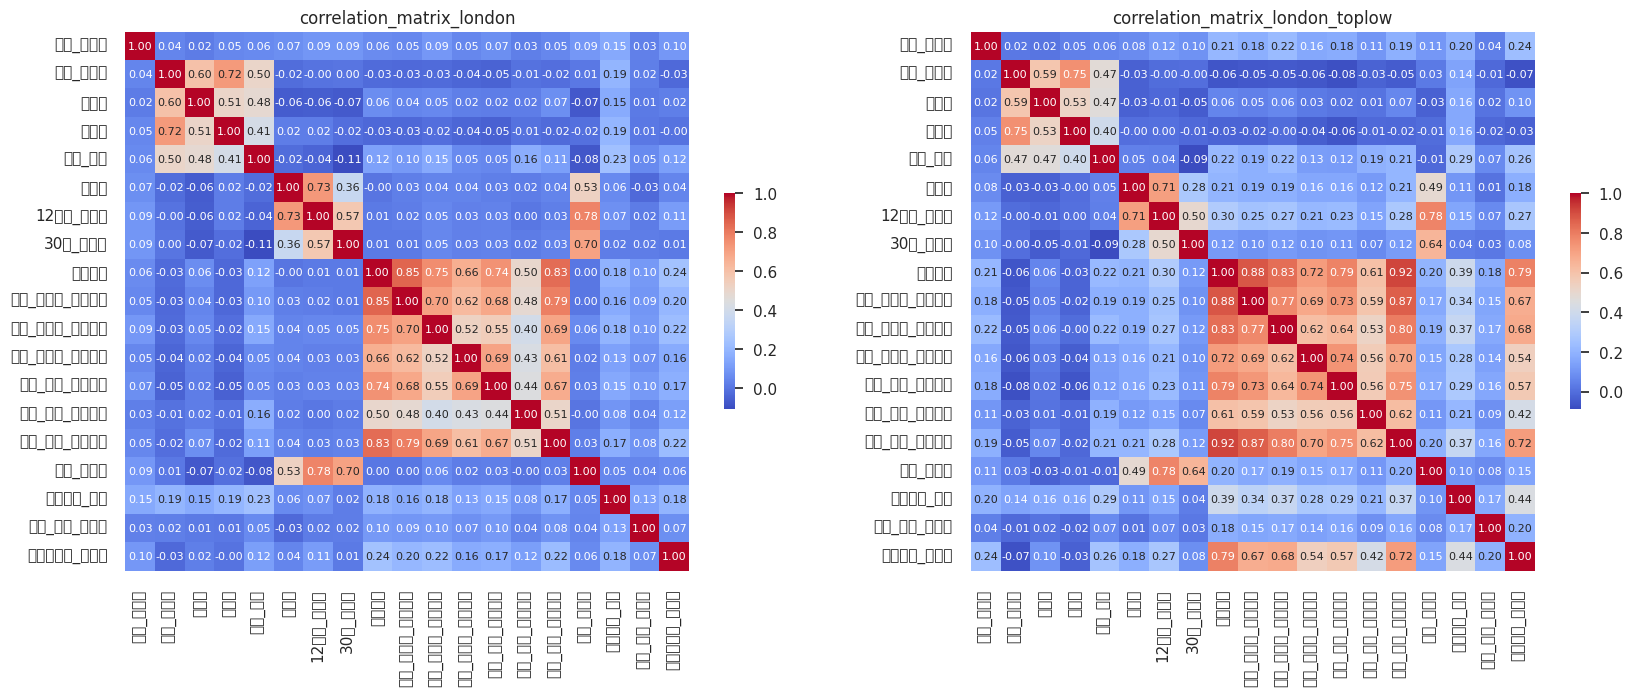

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# DF별 상관계수
correlation_matrix_paris_lists = paris_lists.select_dtypes(include=[np.number]).corr()
correlation_matrix_paris_toplow = paris_toplow.select_dtypes(include=[np.number]).corr()

# 두 개의 히트맵을 한 번에 그리기 위해 subplot을 사용
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# 슈퍼호스트인 경우 히트맵
sns.heatmap(correlation_matrix_paris_lists, ax=axes[0], annot=True, cmap='coolwarm', fmt=".2f",  cbar_kws={'shrink': 0.4},
            annot_kws={'size': 8})  # 글자 크기 조정
axes[0].set_title('correlation_matrix_paris')

# 슈퍼호스트가 아닌 경우 히트맵
sns.heatmap(correlation_matrix_paris_toplow, ax=axes[1], annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'shrink': 0.4},
            annot_kws={'size': 8})  # 글자 크기 조정
axes[1].set_title('correlation_matrix_paris_toplow')

plt.show()

#### 히트맵 해석 1
1. 리뷰수와 리뷰 점수의 상관관계는 없다. >> 리뷰 수가 많을 수록 리뷰 점수가 올라가지는 않는다.
    - 하지만 사람들은 (리뷰의 개수가 더 많은 상품의 리뷰점수)가 더 낮음에도 해당 상품을 선택하는 경향이 있음 >> Suboptional Choice
    - (https://journals.sagepub.com/doi/abs/10.1177/0956797617711291)
    - 추가 논문 검색 필수
2. 숙소의 가격이 비싸질수록 사람들은 숙소에 바라는 기대치가 올라갈 것으로 예측 (논문 기준 필요)
    - 상관관계가 나타나지 않는 것은 당연함. >> 만족도는 다를 수 있기 때문에
    - 숙소 가격 범위에 따른 편의시설 개수, 디스크립션 또는 텍스트 리뷰에 차이를 볼 수 있으면 봐보자.
3. 리뷰 점수는 비율 변수가 아닌 순위 변수 >> 리뷰점수를 수치화하여 비교하지말고, 기준을 정하여 나눠서 비교를 하자.
    - 1) 상위 25% / 하위 25%
    - 2) 게스트 선호 숙소

#### 히트맵 해석2
1. 리뷰점수에 중요한 영향을 끼치는 요인 순위
    1) 가격 만족도 (숙소_가격_리뷰점수)
    2) 정확성 만족도 (숙소_정확성_리뷰점수)
    3) 청결도 만족도 (숙소_청결도_리뷰점수)
    4) 소통 만족도 (숙소_소통_리뷰점수)

- 이 주제를 가지고 리뷰 분석을 하면 되지 않나?

별점 카테고리 (출처: airbnb) <br>

- 전반적인 경험: 전체적인 숙박 경험이 어땠나요?
- 청결도: 숙소가 에어비앤비 기준에 부합했나요?
- 정확도: 최신 사진과 정보를 활용하여 숙소를 정확하게 설명했나요?
- 체크인: 체크인이 수월했나요?
- 의사소통: 호스트가 신속하게 메시지에 응답했나요?
- 위치: 안전, 교통, 명소 관련 정보와 소음이나 숙박에 영향을 줄 수 있는 기타 상황 등에 대해 호스트가 미리 안내했나요?
- 가격 대비 만족도: 가격만큼 가치가 있었나요?
- 편의시설: 숙소 설명에 기재된 모든 편의시설이 제대로 작동했나요?

#### 스피어만 상관계수
- 두 변수 간의 순위 상관관계를 측정 : 두 변수의 값이 순서대로 어떻게 변하는지를 나타냄 (수치를 순위로 보느냐)
- 변수들이 순위형 데이터 타입이거나, 비선형 관계를 가질 때 유용하며, 이상치의 영향을 덜 받음

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning:

Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning:

Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning:

Glyph 51025 (\N{HANGUL SYLLABLE EUNG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning:

Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from current font.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning:

Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning:

Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning:

Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.

/usr/local/l

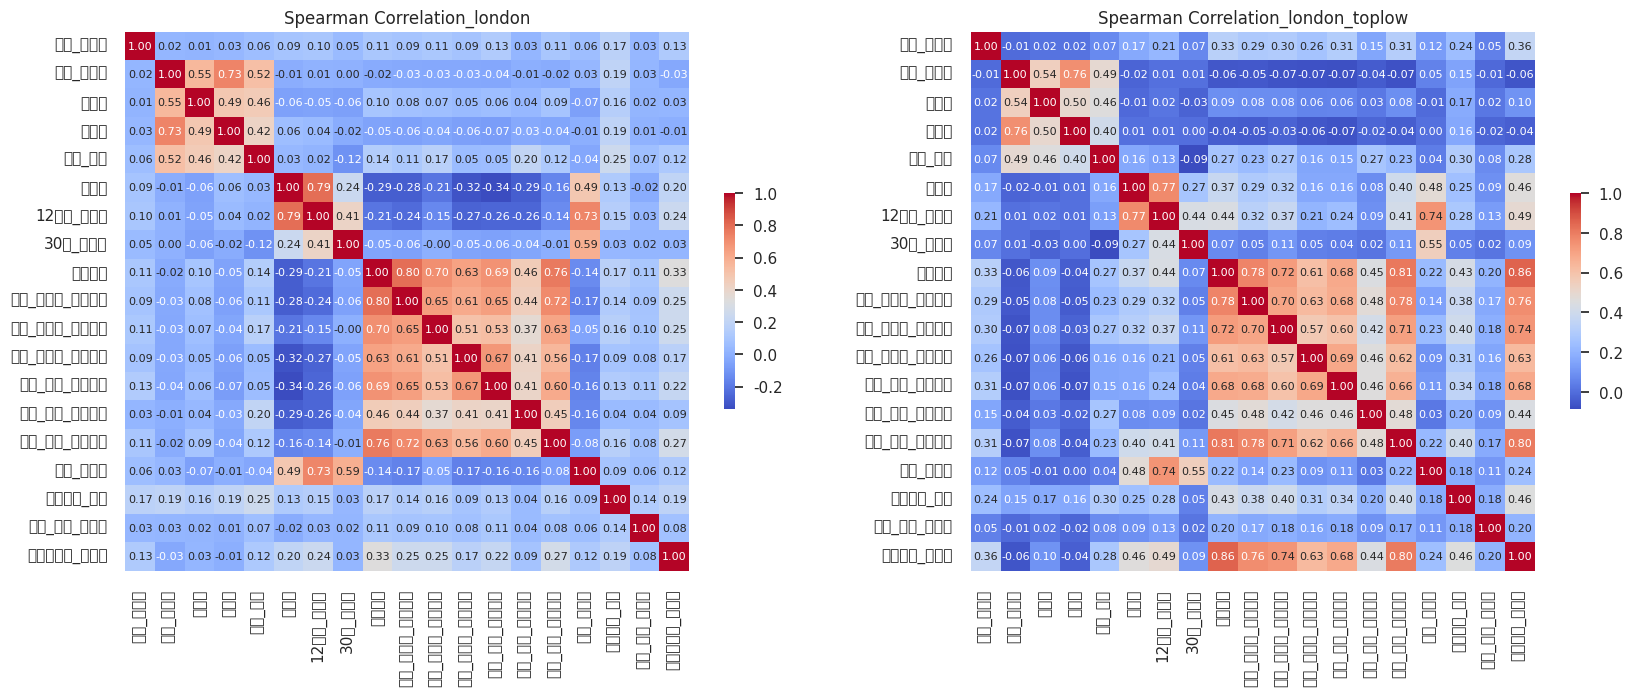

In [32]:
# DF별 상관계수
spearman_corr_paris_lists = paris_lists.select_dtypes(include=[np.number]).corr(method='spearman')
spearman_corr_paris_toplow = paris_toplow.select_dtypes(include=[np.number]).corr(method='spearman')

# 두 개의 히트맵을 한 번에 그리기 위해 subplot을 사용
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# 슈퍼호스트인 경우 히트맵
sns.heatmap(spearman_corr_paris_lists, ax=axes[0], annot=True, cmap='coolwarm', fmt=".2f",  cbar_kws={'shrink': 0.4},
            annot_kws={'size': 8})  # 글자 크기 조정
axes[0].set_title('Spearman Correlation_paris')

# 슈퍼호스트가 아닌 경우 히트맵
sns.heatmap(spearman_corr_paris_toplow, ax=axes[1], annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'shrink': 0.4},
            annot_kws={'size': 8})  # 글자 크기 조정
axes[1].set_title('Spearman Correlation_paris_toplow')

plt.show()

In [33]:
paris_lists.columns

Index(['숙소_id', '숙소_url', '숙소_설명', '호스트_id', '답변_평균시간', '문의_응답률', '슈퍼호스트',
       '프로필_사진', '호스트_신원', '숙소_지역', '숙소_특징', '숙소_유형', '수용_인원수', '침실수', '침대수',
       '편의시설', '숙소_가격', '예약_가능여부', '리뷰수', '12개월_리뷰수', '30일_리뷰수', '마지막_리뷰',
       '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수',
       '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수', '편의시설_개수', '숙소_설명_글자수', '게스트_선호',
       '숙소_등급', '게스트선호_인코딩'],
      dtype='object')

### ANOVA
* 두 개 이상의 그룹 간의 평균 차이를 분석하는 방법
* 범주형 데이터가 두 개 이상의 그룹으로 나뉘어질 때 사용
- 분산을 이용해 통계적 유의성을 검증 >> 분산 분석

In [34]:
category_columns = paris_lists.select_dtypes(include=['category']).columns.tolist()
category_columns

['답변_평균시간', '슈퍼호스트', '프로필_사진', '호스트_신원', '숙소_지역', '숙소_특징', '숙소_유형', '게스트_선호']

#### 리뷰점수

In [35]:
from scipy.stats import f_oneway

# 함수 선언
def anova_result(standard, column):
    # Anova
    groupby_list  = paris_lists.groupby(standard)[column].apply(list)
    f_stat, p_value = f_oneway(*groupby_list)
    # 출력
    if p_value > 0.05:
        result = '귀무가설 채택'
        trueorfalse = '없다.'
    else:
        result = "귀무가설 기각 > 대립가설 채택"
        trueorfalse = '있다.'
    print(f'{standard}별 {column} ANOVA(평균 값 차이) 분석: ')
    print(f"F-statistic: {f_stat}, p-value: {p_value}")
    print(f"{result} : {standard}별 {column} 평균 값의 차이가 {trueorfalse}")
    print()
    print('-' * 60)
    print()

# 컬럼별 리뷰점수 Anova 분석
for col in category_columns:
    anova_result(col, '리뷰점수')

답변_평균시간별 리뷰점수 ANOVA(평균 값 차이) 분석: 
F-statistic: 116.26242127456828, p-value: 8.600892948973397e-75
귀무가설 기각 > 대립가설 채택 : 답변_평균시간별 리뷰점수 평균 값의 차이가 있다.

------------------------------------------------------------

슈퍼호스트별 리뷰점수 ANOVA(평균 값 차이) 분석: 
F-statistic: 1715.2775080197232, p-value: 0.0
귀무가설 기각 > 대립가설 채택 : 슈퍼호스트별 리뷰점수 평균 값의 차이가 있다.

------------------------------------------------------------

프로필_사진별 리뷰점수 ANOVA(평균 값 차이) 분석: 
F-statistic: 2.6548930372225943, p-value: 0.1032437565876889
귀무가설 채택 : 프로필_사진별 리뷰점수 평균 값의 차이가 없다.

------------------------------------------------------------

호스트_신원별 리뷰점수 ANOVA(평균 값 차이) 분석: 
F-statistic: 0.010667373662000443, p-value: 0.9177391772312512
귀무가설 채택 : 호스트_신원별 리뷰점수 평균 값의 차이가 없다.

------------------------------------------------------------

숙소_지역별 리뷰점수 ANOVA(평균 값 차이) 분석: 
F-statistic: 7.378232669967238, p-value: 1.9442305884810993e-20
귀무가설 기각 > 대립가설 채택 : 숙소_지역별 리뷰점수 평균 값의 차이가 있다.

------------------------------------------------------------

숙소_특징별 리뷰

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning:

at least one input has length 0



In [36]:
from scipy.stats import f_oneway

# 함수 선언
def anova_result_toplow(standard, column):
    # 전역변수 선언
    global paris_toplow
    # Anova
    groupby_list  = paris_toplow.groupby(standard)[column].apply(list)
    f_stat, p_value = f_oneway(*groupby_list)
    # 출력
    if p_value > 0.05:
        result = '귀무가설 채택'
        trueorfalse = '없다.'
    else:
        result = "귀무가설 기각 > 대립가설 채택"
        trueorfalse = '있다.'
    print(f'{standard}별 {column} ANOVA(평균 값 차이) 분석: ')
    print(f"F-statistic: {f_stat}, p-value: {p_value}")
    print(f"{result} : {standard}별 {column} 평균 값의 차이가 {trueorfalse}")
    print()
    print('-' * 60)
    print()

# 컬럼별 리뷰점수 Anova 분석
for col in category_columns:
    anova_result_toplow(col, '리뷰점수')

답변_평균시간별 리뷰점수 ANOVA(평균 값 차이) 분석: 
F-statistic: 54.86404524557851, p-value: 5.245587946953537e-35
귀무가설 기각 > 대립가설 채택 : 답변_평균시간별 리뷰점수 평균 값의 차이가 있다.

------------------------------------------------------------

슈퍼호스트별 리뷰점수 ANOVA(평균 값 차이) 분석: 
F-statistic: 9615.792892122932, p-value: 0.0
귀무가설 기각 > 대립가설 채택 : 슈퍼호스트별 리뷰점수 평균 값의 차이가 있다.

------------------------------------------------------------

프로필_사진별 리뷰점수 ANOVA(평균 값 차이) 분석: 
F-statistic: 31.875975651357937, p-value: 1.714087010553732e-08
귀무가설 기각 > 대립가설 채택 : 프로필_사진별 리뷰점수 평균 값의 차이가 있다.

------------------------------------------------------------

호스트_신원별 리뷰점수 ANOVA(평균 값 차이) 분석: 
F-statistic: 27.76590728283925, p-value: 1.414057479740778e-07
귀무가설 기각 > 대립가설 채택 : 호스트_신원별 리뷰점수 평균 값의 차이가 있다.

------------------------------------------------------------

숙소_지역별 리뷰점수 ANOVA(평균 값 차이) 분석: 
F-statistic: 4.810599893837934, p-value: 2.3229920726871046e-11
귀무가설 기각 > 대립가설 채택 : 숙소_지역별 리뷰점수 평균 값의 차이가 있다.

--------------------------------------------------

### 카이제곱 검정

#### 게스트 선호 (london_lists)

In [37]:
from scipy.stats import chi2_contingency

def chi2_result(column1, column2):
    # chi2
    contingency_table = pd.crosstab(paris_lists[column1], paris_lists[column2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # 출력
    if p > 0.05:
        result = '귀무가설 채택'
        trueorfalse = '상호 독립적이다.'
    else:
        result = "귀무가설 기각 > 대립가설 채택"
        trueorfalse = '독립적이지 않고, 연관성이 있다.'

    print(f'{column1}과 {column2}의 독립성 분석: ')
    print(f"Chi-squared: {chi2}, p-value: {p}")
    print(f"{result} : {column1}과(와) {column2}는 {trueorfalse}")
    print()
    print('-' * 60)
    print()

# Chi-squared 결과 조회
for col in category_columns:
    chi2_result(col, '게스트_선호')

답변_평균시간과 게스트_선호의 독립성 분석: 
Chi-squared: 147.83940830456083, p-value: 7.705909807726072e-32
귀무가설 기각 > 대립가설 채택 : 답변_평균시간과(와) 게스트_선호는 독립적이지 않고, 연관성이 있다.

------------------------------------------------------------

슈퍼호스트과 게스트_선호의 독립성 분석: 
Chi-squared: 9218.182384932768, p-value: 0.0
귀무가설 기각 > 대립가설 채택 : 슈퍼호스트과(와) 게스트_선호는 독립적이지 않고, 연관성이 있다.

------------------------------------------------------------

프로필_사진과 게스트_선호의 독립성 분석: 
Chi-squared: 39.68956645674461, p-value: 2.977117252929736e-10
귀무가설 기각 > 대립가설 채택 : 프로필_사진과(와) 게스트_선호는 독립적이지 않고, 연관성이 있다.

------------------------------------------------------------

호스트_신원과 게스트_선호의 독립성 분석: 
Chi-squared: 57.26947850656258, p-value: 3.8000687221703026e-14
귀무가설 기각 > 대립가설 채택 : 호스트_신원과(와) 게스트_선호는 독립적이지 않고, 연관성이 있다.

------------------------------------------------------------

숙소_지역과 게스트_선호의 독립성 분석: 
Chi-squared: 37.96378847849536, p-value: 0.00599797760565854
귀무가설 기각 > 대립가설 채택 : 숙소_지역과(와) 게스트_선호는 독립적이지 않고, 연관성이 있다.

-------------------------------------

#### 숙소_등급(london_toplow)

In [38]:
from scipy.stats import chi2_contingency

def chi2_result_toplow(column1, column2):
    # 전역변수 선언
    global paris_toplow
    # chi2
    contingency_table = pd.crosstab(paris_toplow[column1], paris_toplow[column2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # 출력
    if p > 0.05:
        result = '귀무가설 채택'
        trueorfalse = '상호 독립적이다.'
    else:
        result = "귀무가설 기각 > 대립가설 채택"
        trueorfalse = '독립적이지 않고, 연관성이 있다.'

    print(f'{column1}과 {column2}의 독립성 분석: ')
    print(f"Chi-squared: {chi2}, p-value: {p}")
    print(f"{result} : {column1}과(와) {column2}는 {trueorfalse}")
    print()
    print('-' * 60)
    print()

# Chi-squared 결과 조회
for col in category_columns:
    chi2_result_toplow(col, '숙소_등급')

답변_평균시간과 숙소_등급의 독립성 분석: 
Chi-squared: 209.29337123621139, p-value: 4.1390442102750414e-45
귀무가설 기각 > 대립가설 채택 : 답변_평균시간과(와) 숙소_등급는 독립적이지 않고, 연관성이 있다.

------------------------------------------------------------

슈퍼호스트과 숙소_등급의 독립성 분석: 
Chi-squared: 6082.011076652373, p-value: 0.0
귀무가설 기각 > 대립가설 채택 : 슈퍼호스트과(와) 숙소_등급는 독립적이지 않고, 연관성이 있다.

------------------------------------------------------------

프로필_사진과 숙소_등급의 독립성 분석: 
Chi-squared: 47.739795614911166, p-value: 4.867109784109021e-12
귀무가설 기각 > 대립가설 채택 : 프로필_사진과(와) 숙소_등급는 독립적이지 않고, 연관성이 있다.

------------------------------------------------------------

호스트_신원과 숙소_등급의 독립성 분석: 
Chi-squared: 48.37282231508119, p-value: 3.5241871821663703e-12
귀무가설 기각 > 대립가설 채택 : 호스트_신원과(와) 숙소_등급는 독립적이지 않고, 연관성이 있다.

------------------------------------------------------------

숙소_지역과 숙소_등급의 독립성 분석: 
Chi-squared: 114.83282083981514, p-value: 1.017824876905436e-15
귀무가설 기각 > 대립가설 채택 : 숙소_지역과(와) 숙소_등급는 독립적이지 않고, 연관성이 있다.

------------------------------------------

# 모델링

## 모델링의 방향성

1. 1번 모델링 방향성

[변수 정의]
- 기준 데이터 프레임 : london_lists
- 종속 변수 : 리뷰점수(숫자형 컬럼)
- 조절 변수 : 게스트_선호(이진변수)
- 독립 변수
    - 숫자형 컬럼: '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수'

2. 2번 모델링 방향성 >> 런던_모델링_02 파일에서 진행 예정

  [변수 정의]
- 기준 데이터 프레임 : london_lists
- 종속 변수 : 게스트_선호(이진변수)
- 독립 변수
    - 숫자형 컬럼: '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수'

## 데이터 로그화 및 스케일링

In [39]:
# 숫자형 컬럼만 선별
numeric_columns = paris_lists.select_dtypes(include=['float64', 'int64']).columns

# df 복사
paris_log = paris_lists.copy()

# 로그 변환
paris_log[numeric_columns] = np.log1p(paris_lists[numeric_columns])

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# StandardScaler 적용
scaler_standard = StandardScaler()
paris_standard = paris_lists.copy()
paris_standard_log = paris_log.copy()
paris_standard[numeric_columns] = scaler_standard.fit_transform(paris_lists[numeric_columns])
paris_standard_log[numeric_columns] = scaler_standard.fit_transform(paris_log[numeric_columns])

# MinMaxScaler 적용
scaler_minmax = MinMaxScaler()
paris_normal = paris_lists.copy()
paris_normal_log = paris_log.copy()
paris_normal[numeric_columns] = scaler_minmax.fit_transform(paris_lists[numeric_columns])
paris_normal_log[numeric_columns] = scaler_minmax.fit_transform(paris_log[numeric_columns])

## 회귀 분석 : 리뷰 점수 - 전체

In [41]:
paris_standard_selected = paris_standard[numeric_columns]
paris_normal_selected = paris_normal[numeric_columns]
paris_standard_log_selected = paris_standard_log[numeric_columns]
paris_normal_log_selected = paris_normal_log[numeric_columns]

### 사용할 스케일링 방법 결정

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df_lists = [paris_standard_selected, paris_normal_selected, paris_standard_log_selected, paris_normal_log_selected]

for df in df_lists:

    # 독립 변수와 종속 변수로 데이터를 나눔
    X = df.drop(columns='리뷰점수')
    y = df['리뷰점수']

    # 학습용과 테스트용으로 데이터를 나눔
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 회귀분석 모델을 만들고 학습
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # 모델 평가
    y_pred = lr.predict(X_test)

    # 회귀분석 평가 지표 (mse, rmse, mae / 결정계수 r2_score)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = round(r2_score(y_test, y_pred),2)

    print('MSE: %0.2f'%mse)
    print('RMSE: %0.2f'%rmse)
    print('MAE: %0.2f'%mae)
    print('결정계수(r2_score):',r2)
    print('-'*50)


MSE: 0.16
RMSE: 0.39
MAE: 0.22
결정계수(r2_score): 0.85
--------------------------------------------------
MSE: 0.00
RMSE: 0.04
MAE: 0.02
결정계수(r2_score): 0.85
--------------------------------------------------
MSE: 0.14
RMSE: 0.38
MAE: 0.19
결정계수(r2_score): 0.87
--------------------------------------------------
MSE: 0.00
RMSE: 0.03
MAE: 0.01
결정계수(r2_score): 0.87
--------------------------------------------------


### 다중 회귀 분석

In [43]:
# 독립 변수와 종속 변수로 데이터를 나눔
X = paris_normal_log_selected.drop(columns='리뷰점수')
y = paris_normal_log_selected['리뷰점수']

# 학습용과 테스트용으로 데이터를 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀분석 모델을 만들고 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 모델 평가
y_pred = lr.predict(X_test)

# 회귀분석 평가 지표 (mse, rmse, mae / 결정계수 r2_score)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = round(r2_score(y_test, y_pred),2)

print('MSE: %0.2f'%mse)
print('RMSE: %0.2f'%rmse)
print('MAE: %0.2f'%mae)
print('결정계수(r2_score):',r2)

MSE: 0.00
RMSE: 0.03
MAE: 0.01
결정계수(r2_score): 0.87


In [44]:
import statsmodels.api as sm

# 상수항 추가
X = sm.add_constant(X)

# 회귀모형 적합
paris_normal__log_lr_model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(paris_normal__log_lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     8614.
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:51:58   Log-Likelihood:                 56500.
No. Observations:               26128   AIC:                        -1.130e+05
Df Residuals:                   26109   BIC:                        -1.128e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0536      0.005    -11.194      

### p value < 0.05인 컬럼만 선별

In [45]:
# 독립 변수와 종속 변수로 데이터를 나눔
X = paris_normal_log_selected[['문의_응답률', '수용_인원수', '침실수', '숙소_가격', '리뷰수', '12개월_리뷰수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수', '편의시설_개수', '게스트선호_인코딩']]
y = paris_normal_log_selected['리뷰점수']

# 학습용과 테스트용으로 데이터를 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀분석 모델을 만들고 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 모델 평가
y_pred = lr.predict(X_test)

# 회귀분석 평가 지표 (mse, rmse, mae / 결정계수 r2_score)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = round(r2_score(y_test, y_pred),2)

print('MSE: %0.2f'%mse)
print('RMSE: %0.2f'%rmse)
print('MAE: %0.2f'%mae)
print('결정계수(r2_score):',r2)

MSE: 0.00
RMSE: 0.03
MAE: 0.01
결정계수(r2_score): 0.87


In [46]:
import statsmodels.api as sm

# 상수항 추가
X = sm.add_constant(X)

# 회귀모형 적합
paris_normal__log_lr_model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(paris_normal__log_lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 1.034e+04
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:51:59   Log-Likelihood:                 56499.
No. Observations:               26128   AIC:                        -1.130e+05
Df Residuals:                   26112   BIC:                        -1.128e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0529      0.005    -11.563      

## 회귀 분석 : 리뷰 점수 - 리뷰 별점 간

### 사용할 스케일링 방법 결정

In [47]:
numeric_columns_selected = ['리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '게스트_선호']

paris_standard_selected = paris_standard[numeric_columns_selected]
paris_normal_selected = paris_normal[numeric_columns_selected]
paris_standard_log_selected = paris_standard_log[numeric_columns_selected]
paris_normal_log_selected = paris_normal_log[numeric_columns_selected]

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df_lists = [paris_standard_selected, paris_normal_selected, paris_standard_log_selected, paris_normal_log_selected]

for df in df_lists:

    # 독립 변수와 종속 변수로 데이터를 나눔
    X = df[['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']]
    y = df['리뷰점수']

    # 학습용과 테스트용으로 데이터를 나눔
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 회귀분석 모델을 만들고 학습
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # 모델 평가
    y_pred = lr.predict(X_test)

    # 회귀분석 평가 지표 (mse, rmse, mae / 결정계수 r2_score)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = round(r2_score(y_test, y_pred),2)

    print('MSE: %0.2f'%mse)
    print('RMSE: %0.2f'%rmse)
    print('MAE: %0.2f'%mae)
    print('결정계수(r2_score):',r2)
    print('-'*50)


MSE: 0.16
RMSE: 0.40
MAE: 0.23
결정계수(r2_score): 0.85
--------------------------------------------------
MSE: 0.00
RMSE: 0.04
MAE: 0.02
결정계수(r2_score): 0.85
--------------------------------------------------
MSE: 0.15
RMSE: 0.38
MAE: 0.20
결정계수(r2_score): 0.87
--------------------------------------------------
MSE: 0.00
RMSE: 0.03
MAE: 0.01
결정계수(r2_score): 0.87
--------------------------------------------------


### 다중회귀분석_normal_log

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# 독립 변수와 종속 변수로 데이터를 나눔
X = paris_normal_log_selected[['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']]
y = paris_normal_log_selected['리뷰점수']

# 학습용과 테스트용으로 데이터를 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀분석 모델을 만들고 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 모델 평가
y_pred = lr.predict(X_test)

# 회귀분석 평가 지표 (mse, rmse, mae / 결정계수 r2_score)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = round(r2_score(y_test, y_pred),2)

print('MSE: %0.2f'%mse)
print('RMSE: %0.2f'%rmse)
print('MAE: %0.2f'%mae)
print('결정계수(r2_score):',r2)
print()
print('y절편: ', lr.intercept_)

MSE: 0.00
RMSE: 0.03
MAE: 0.01
결정계수(r2_score): 0.87

y절편:  -0.06293387915129567


In [50]:
import statsmodels.api as sm

# 상수항 추가
X = sm.add_constant(X)

# 회귀모형 적합
paris_normal__log_lr_model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(paris_normal__log_lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                 2.526e+04
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:51:59   Log-Likelihood:                 56240.
No. Observations:               26128   AIC:                        -1.125e+05
Df Residuals:                   26121   BIC:                        -1.124e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0583      0.004    -16.372      

### 계층적 회귀분석_normal_log

In [51]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# '게스트_선호' 컬럼을 더미 변수로 변환 (카테고리 타입에서 숫자형으로 변환)
paris_normal_log_selected['게스트_선호'] = paris_normal_log_selected['게스트_선호'].map({'t': 1, 'f': 0}).astype(int)

# 독립 변수와 종속 변수 설정
X = paris_normal_log_selected[['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '게스트_선호']]
y = paris_normal_log_selected['리뷰점수']

# 상호작용 항 추가
for col in ['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']:
    X[col + '_x_게스트_선호'] = X[col] * X['게스트_선호']

# 학습용과 테스트용 데이터 셋 분류
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀분석 모델 생성 및 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 모델 평가
y_pred = lr.predict(X_test)

# 회귀분석 평가 지표 (mse, rmse, mae / 결정계수 r2_score)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = round(r2_score(y_test, y_pred), 2)

print('MSE: %0.2f' % mse)
print('RMSE: %0.2f' % rmse)
print('MAE: %0.2f' % mae)
print('결정계수(r2_score):', r2)
print()
print('y절편: ', lr.intercept_)

# 회귀 계수 출력
coefficients = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

MSE: 0.00
RMSE: 0.03
MAE: 0.01
결정계수(r2_score): 0.87

y절편:  -0.05911397035586341
                      Coefficient
숙소_정확성_리뷰점수              0.324285
숙소_청결도_리뷰점수              0.187495
숙소_체크인_리뷰점수              0.044693
숙소_소통_리뷰점수               0.204400
숙소_위치_리뷰점수               0.036741
숙소_가격_리뷰점수               0.263604
게스트_선호                   0.702481
숙소_정확성_리뷰점수_x_게스트_선호    -0.167798
숙소_청결도_리뷰점수_x_게스트_선호    -0.150120
숙소_체크인_리뷰점수_x_게스트_선호    -0.025854
숙소_소통_리뷰점수_x_게스트_선호     -0.137288
숙소_위치_리뷰점수_x_게스트_선호     -0.020044
숙소_가격_리뷰점수_x_게스트_선호     -0.205686


<ipython-input-51-564c579735dd>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
import statsmodels.api as sm

# 상수항 추가
X = sm.add_constant(X)

# 회귀모형 적합
paris_normal_log_hr_model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(paris_normal_log_hr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 1.181e+04
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:51:59   Log-Likelihood:                 56388.
No. Observations:               26128   AIC:                        -1.127e+05
Df Residuals:                   26114   BIC:                        -1.126e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0548 

## PCA_리뷰점수 - 전체

### PCA

In [53]:
# 로그 변환을 한 df만 사용
paris_normal = paris_normal_log
paris_standard = paris_standard_log

# 회귀분석 결과로 선택한 컬럼만 불러오기
columns_lr_selected = ['문의_응답률', '수용_인원수', '침실수', '숙소_가격', '리뷰수', '12개월_리뷰수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수', '편의시설_개수', '게스트선호_인코딩']
X = paris_normal[columns_lr_selected].values
y_normal = paris_normal['리뷰점수'].values

In [54]:
from sklearn.decomposition import PCA

X = paris_normal[columns_lr_selected].values
y_normal = paris_normal['리뷰점수'].values

# PCA 적용
pca = PCA(n_components=15)  # 주성분의 수
principal_components = pca.fit_transform(X)

# 결과를 데이터프레임으로 변환
paris_normal_pca = pd.DataFrame(data=principal_components, columns=[f"pca{num+1}" for num in range(X.shape[1])])

paris_normal_pca

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15
0,-0.098256,-0.463095,0.212861,0.202149,-0.081384,-0.027572,-0.222939,0.017618,0.002917,-0.022416,-0.013098,0.013593,-0.005082,-0.004807,-0.020800
1,-0.012321,-0.508099,0.534164,0.175714,-0.057779,0.059031,-0.121410,0.029286,0.024385,-0.024452,-0.009349,0.014132,0.015525,0.000228,-0.017397
2,-0.025084,0.297460,0.445827,-0.134197,0.065439,-0.031216,-0.098104,0.153385,-0.085815,0.056902,-0.038377,0.020233,-0.004937,-0.004331,0.000402
3,-0.061361,0.183564,0.274620,0.132120,-0.116820,0.104915,-0.203938,0.036835,-0.001925,-0.004622,-0.003329,0.018035,-0.003973,0.022780,-0.005707
4,-0.019892,0.404757,0.380578,-0.066549,-0.055898,0.113512,-0.232232,-0.065366,0.008314,0.022570,-0.039178,0.000294,0.004719,0.004305,0.010144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26123,-0.239641,-0.163552,-0.267696,-0.182527,0.149822,-0.469005,0.121286,-0.017396,-0.099334,0.019826,0.010135,0.010471,0.002483,-0.005613,-0.007570
26124,-0.215004,-0.043166,-0.325151,-0.084205,-0.161729,0.019137,0.066583,-0.105873,-0.058161,0.032895,-0.005729,0.007782,-0.007411,-0.006904,-0.006712
26125,-0.208340,-0.197855,-0.145933,0.480338,-0.203808,-0.053053,0.222940,0.062612,-0.059306,0.054385,0.007566,0.014255,0.002250,-0.006932,-0.008999
26126,-0.218230,-0.050212,-0.328470,-0.089594,-0.144430,-0.007782,0.068656,-0.096254,-0.059466,0.030759,-0.004342,0.008099,-0.006473,-0.006837,-0.006923


In [55]:
# 주성분의 설명력과 기여율 구하기

result_pca_normal = pd.DataFrame({'설명가능한 분산 비율(고유값)' : pca.explained_variance_, '기여율' : pca.explained_variance_ratio_},
                                   index = np.array([f"pca{num+1}" for num in range(X.shape[1])]))
result_pca_normal['누적기여율'] = result_pca_normal['기여율'].cumsum()

result_pca_normal

,설명가능한 분산 비율(고유값),기여율,누적기여율
pca1,0.128496,0.352792,0.352792
pca2,0.083209,0.228454,0.581246
pca3,0.055802,0.153209,0.734454
pca4,0.025778,0.070775,0.805229
pca5,0.020564,0.056459,0.861688
pca6,0.015613,0.042867,0.904555
pca7,0.010997,0.030194,0.934748
pca8,0.008896,0.024424,0.959172
pca9,0.003286,0.009022,0.968194
pca10,0.003173,0.008710,0.976905


고유값 0.7 이상 | 누적 기여율 80% 이상까지 사용

In [56]:
import plotly.express as px

# 'paris_standard_pca' 산점도
fig = px.scatter(
    paris_normal_pca,
    x='pca1',
    y='pca2',
    color=y_normal,
    labels={'pc1': '주성분 1', 'pc2': '주성분 2', 'color': '리뷰 점수'},
    title='Standard 데이터의 PCA',
    color_continuous_scale='viridis'
)

fig.update_layout(
    width=800,
    height=600
)

fig.show()


### 다중 선형 회귀

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 주성분과 종속 변수를 포함한 데이터프레임 생성
paris_normal_pca = pd.concat([paris_normal_pca, pd.DataFrame(y_normal, columns=['리뷰점수'])], axis=1)

# 독립 변수와 종속 변수로 데이터를 나눔
X = paris_normal_pca[['pca1', 'pca2', 'pca3', 'pca4']]
y = paris_normal_pca['리뷰점수']

# 학습용과 테스트용으로 데이터를 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀분석 모델을 만들고 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 모델 평가
y_pred = lr.predict(X_test)

# 회귀분석 평가 지표 (mse, rmse, mae / 결정계수 r2_score)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = round(r2_score(y_test, y_pred),2)

print('MSE: %0.2f'%mse)
print('RMSE: %0.2f'%rmse)
print('MAE: %0.2f'%mae)
print('결정계수(r2_score):',r2)
print()
print('y절편: ', np.round(lr.intercept_,2))

MSE: 0.01
RMSE: 0.07
MAE: 0.04
결정계수(r2_score): 0.11

y절편:  0.96


In [58]:
import statsmodels.api as sm

# 상수항 추가
X = sm.add_constant(X)

# 회귀모형 적합
paris_normal_pca_lr_model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(paris_normal_pca_lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     745.3
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:52:00   Log-Likelihood:                 32605.
No. Observations:               26128   AIC:                        -6.520e+04
Df Residuals:                   26123   BIC:                        -6.516e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9561      0.000   2224.408      0.0

### 계층적 선형회귀

In [59]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 주성분과 종속 변수를 포함한 데이터프레임 생성
paris_normal_pca = pd.concat([paris_normal_pca, paris_normal['게스트_선호']], axis=1)


# '게스트_선호' 컬럼을 더미 변수로 변환 (카테고리 타입에서 숫자형으로 변환)
paris_normal_pca['게스트_선호'] = paris_normal_pca['게스트_선호'].map({'t': 1, 'f': 0}).astype(int)

# 독립 변수와 종속 변수 설정
X = paris_normal_pca[['pca1', 'pca2', 'pca3', 'pca4', '게스트_선호']]
y = paris_normal_pca['리뷰점수']

# 상호작용 항 추가
for col in ['pca1', 'pca2', 'pca3', 'pca4']:
    X[col + '_x_게스트_선호'] = X[col] * X['게스트_선호']

# 학습용과 테스트용 데이터 셋 분류
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀분석 모델 생성 및 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 모델 평가
y_pred = lr.predict(X_test)

# 회귀분석 평가 지표 (mse, rmse, mae / 결정계수 r2_score)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = round(r2_score(y_test, y_pred), 2)

print('MSE: %0.2f' % mse)
print('RMSE: %0.2f' % rmse)
print('MAE: %0.2f' % mae)
print('결정계수(r2_score):', r2)
print()
print('y절편: ', lr.intercept_)

# # 회귀 계수 출력
# coefficients = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
# print(coefficients)

MSE: 0.00
RMSE: 0.05
MAE: 0.03
결정계수(r2_score): 0.63

y절편:  1.4391911137442426


<ipython-input-59-ba976f179011>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-59-ba976f179011>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-59-ba976f179011>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-59-ba97

In [60]:
import statsmodels.api as sm

# 상수항 추가
X = sm.add_constant(X)

# 회귀모형 적합
paris_normal_pca_hr_model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(paris_normal_pca_hr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     4283.
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:52:00   Log-Likelihood:                 43037.
No. Observations:               26128   AIC:                        -8.605e+04
Df Residuals:                   26118   BIC:                        -8.597e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.4456      0.003    521.583

## 요인 분석

요인분석(Factor Analysis)은 변수들 간의 상관관계를 고려하여 저변에 내재된 개념인 요인(잠재 요인)들을 추출해내는 분석방법이다.

다른 말로 하면, 요인분석은 변수들 간의 상관관계를 고려하여 서로 유사한 변수들 끼리 묶어주는 방법이다.

또 다른 말로 하면, 많은 변수로 구성된 데이터가 몇 개의 요인에 의해 영향을 받는가를 알아보는 것이라고도 할 수 있다.

<요인 분석 방법>

요인분석방법은 자료의 총분산을 구성하는 요소 중 어느 부분을 사용하느냐에 따라 다음과 같은 두 가지로 구성됩니다.

① 주성분분석(principle component analysis) : 원래의 변수들의 분산 중 가급적 많은 부분을 설명하는 소수의 요인을 추출하는데 목적이 있고, 공통분산이 크다는 사실을 아는 경우에 적절합니다. 주성분분석의 경우 상관행렬의 대각선에 1이 사용되는데 이는 모든 분산이 공유된다는 것을 의미합니다.

② 공통요인분석(common factor analysis) : 원래 변수들의 토대가 되는 잠재차원들을 찾아내고, 분산의 구성에 대한 사전지식이 별로 없는 경우에 적절합니다.

In [61]:
# !pip install factor-analyzer

In [62]:
# 회귀분석 결과로 선택한 컬럼만 불러오기
columns_lr_selected = ['문의_응답률', '수용_인원수', '침실수', '숙소_가격', '리뷰수', '12개월_리뷰수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수', '편의시설_개수', '게스트선호_인코딩']
paris_normal[columns_lr_selected]

,문의_응답률,수용_인원수,침실수,숙소_가격,리뷰수,12개월_리뷰수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,편의시설_개수,게스트선호_인코딩
0,1.000000,0.292481,0.000000,0.684567,0.546556,0.334510,0.956499,0.935573,0.980061,0.983157,0.992383,0.959676,0.132658,0.755835,0.0
1,1.000000,0.292481,0.000000,0.618231,0.725577,0.570103,0.942063,0.932311,0.970710,0.975397,0.993911,0.933943,0.299567,0.865125,0.0
2,1.000000,0.660964,0.792481,0.673748,0.708921,0.382270,0.969141,0.912486,0.986243,0.981611,0.989318,0.958089,0.301209,0.774872,0.0
3,1.000000,0.660964,0.500000,0.842486,0.552828,0.323056,0.970710,0.945291,0.953311,0.990852,0.993911,0.951713,0.129530,0.948698,0.0
4,0.977755,0.660964,0.792481,0.969950,0.616454,0.398093,0.964421,0.922452,0.980061,0.978509,0.996961,0.925750,0.200750,0.930395,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26123,1.000000,0.292481,0.500000,0.506765,0.055685,0.067314,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.283433,0.261282,0.0
26124,1.000000,0.292481,0.500000,0.708119,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.176906,0.824254,0.0
26125,0.990661,0.660964,0.000000,0.543567,0.055685,0.067314,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.283433,0.883197,0.0
26126,1.000000,0.292481,0.500000,0.693237,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.176906,0.792497,0.0


### 최적의 n_factor값 찾기

####  Scree Plot을 사용한 고유값 분석

In [65]:
# !pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 5.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=d5627eae6a58261397fe85e0997dc2c6035269c6da0918d11111132f1740ccf6
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning:

The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.



KMO: 0.7974339139824059, Bartlett p-value: 0.0


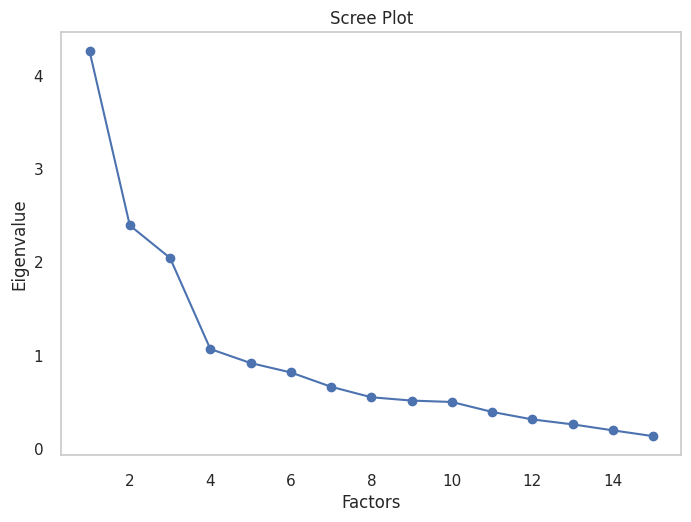

In [66]:
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

# KMO와 Bartlett 테스트
kmo_all, kmo_model = calculate_kmo(paris_normal[columns_lr_selected])
bartlett_chi_square_value, bartlett_p_value = calculate_bartlett_sphericity(paris_normal[columns_lr_selected])
print(f"KMO: {kmo_model}, Bartlett p-value: {bartlett_p_value}")

# 고유값 계산
fa = FactorAnalyzer(n_factors=len(columns_lr_selected), rotation=None)
fa.fit(paris_normal[columns_lr_selected])
ev, v = fa.get_eigenvalues()

# Scree Plot
plt.scatter(range(1, len(ev) + 1), ev)
plt.plot(range(1, len(ev) + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


#### 분산 설명 기준

/usr/local/lib/python3.10/dist-packages/factor_analyzer/factor_analyzer.py:663: UserWarning:

No rotation will be performed when the number of factors equals 1.



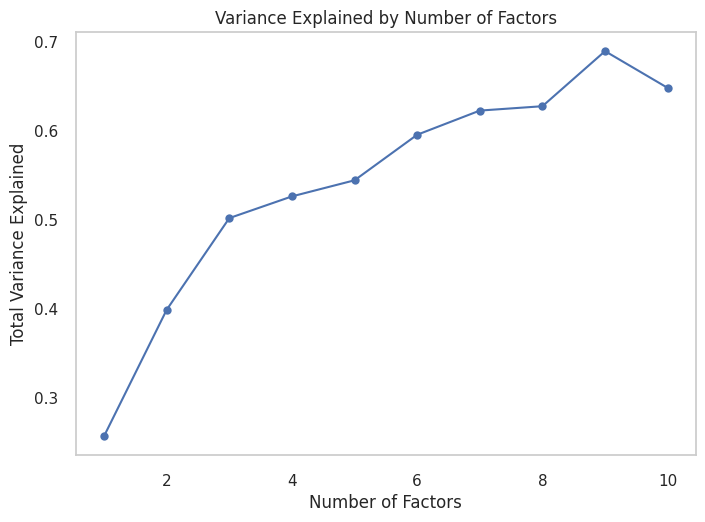

In [67]:
# 요인 수를 1부터 10까지 변화시키며 분산 설명 비율 계산
total_variance = []
for n in range(1, 11):
    fa = FactorAnalyzer(n_factors=n, rotation="varimax")
    fa.fit(paris_normal[columns_lr_selected])
    total_variance.append(fa.get_factor_variance()[1].sum())

plt.plot(range(1, 11), total_variance, marker='o')
plt.xlabel('Number of Factors')
plt.ylabel('Total Variance Explained')
plt.title('Variance Explained by Number of Factors')
plt.grid()
plt.show()

#### 평행 분석

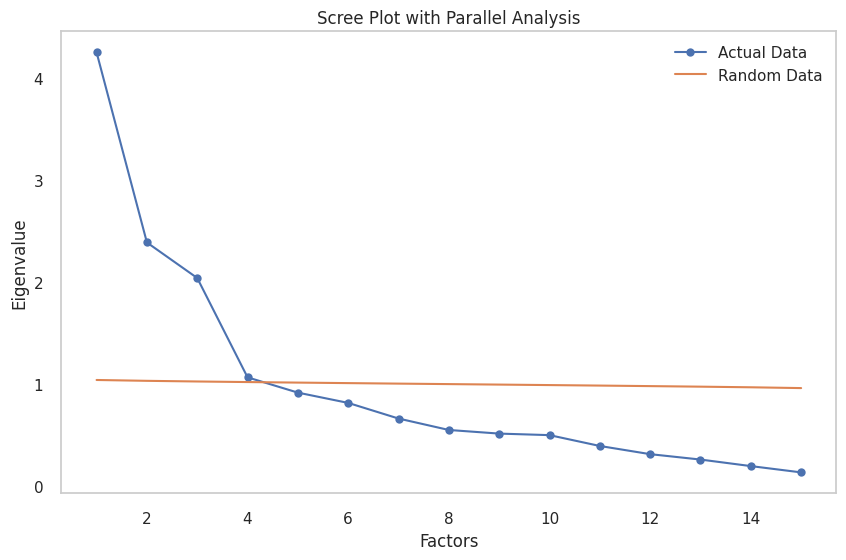

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

# 데이터 준비
data = paris_normal[columns_lr_selected]

# 실제 데이터의 고유값 계산
fa = FactorAnalyzer(n_factors=len(columns_lr_selected), rotation=None)
fa.fit(data)
ev, v = fa.get_eigenvalues()

# 무작위 데이터의 고유값 계산 함수
def get_random_eigenvalues(data, n_iter=1000):
    random_ev = []
    for _ in range(n_iter):
        random_data = np.random.normal(size=data.shape)
        fa.fit(random_data)
        ev, _ = fa.get_eigenvalues()
        random_ev.append(ev)
    return np.mean(random_ev, axis=0)

# 무작위 데이터의 평균 고유값 계산
random_ev = get_random_eigenvalues(data)

# Scree Plot 및 평행 분석 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ev) + 1), ev, marker='o', label='Actual Data')
plt.plot(range(1, len(random_ev) + 1), random_ev, marker='x', label='Random Data')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot with Parallel Analysis')
plt.legend()
plt.grid()
plt.show()


In [69]:
# 평행 분석 결과 기반 요인 수 결정
n_factors_parallel = np.sum(ev > random_ev)
print(f"Parallel Analysis suggests {n_factors_parallel} factors")

Parallel Analysis suggests 4 factors


### 요인분석

In [70]:
# 선택된 요인 수로 요인 분석 수행
fa = FactorAnalyzer(n_factors=n_factors_parallel, rotation="varimax")
fa.fit(data)

# 데이터프레임화
paris_loadings = pd.concat(
    [pd.DataFrame(fa.loadings_, columns=[f'Factor{i + 1}' for i in range(n_factors_parallel)]),
     pd.DataFrame(data.columns.tolist(), columns=['name of columns'])],
    axis=1
)
paris_loadings

,Factor1,Factor2,Factor3,Factor4,name of columns
0,0.023125,0.074316,0.029132,0.210221,문의_응답률
1,-0.046763,0.041702,0.836898,-0.014924,수용_인원수
2,0.033474,-0.070352,0.605691,0.051943,침실수
3,0.072681,-0.048535,0.657755,0.299125,숙소_가격
4,0.046652,0.727607,-0.041672,0.245382,리뷰수
5,0.038610,0.983498,-0.023644,0.234349,12개월_리뷰수
6,0.867304,0.009332,0.010009,0.150624,숙소_정확성_리뷰점수
7,0.737341,0.012427,0.022304,0.260270,숙소_청결도_리뷰점수
8,0.764947,0.052517,0.004619,0.004052,숙소_체크인_리뷰점수
9,0.814938,0.063578,-0.002572,0.009233,숙소_소통_리뷰점수


Factor 간 공통성 점수 확인

In [115]:
import pandas as pd
from factor_analyzer import FactorAnalyzer

# 요인 분석 수행
fa = FactorAnalyzer(n_factors=n_factors_parallel, rotation="varimax")
fa.fit(data)

# 데이터프레임화
paris_loadings = pd.concat(
    [pd.DataFrame(fa.loadings_, columns=[f'Factor{i + 1}' for i in range(n_factors_parallel)]),
     pd.DataFrame(data.columns.tolist(), columns=['name of columns'])],
    axis=1
)
print("Factor Loadings:")
print(paris_loadings)

# 방법 1: get_communalities 메서드를 사용하여 공통성 점수 확인
communalities_method1 = fa.get_communalities()
communalities_df1 = pd.DataFrame(communalities_method1, columns=['Communalities'])
communalities_df1['name of columns'] = data.columns.tolist()

print("\nCommunalities (Method 1):")
print(communalities_df1)

# 방법 2: 직접 계산하여 공통성 점수 확인
loadings_squared = paris_loadings.iloc[:, :-1] ** 2
communalities_method2 = loadings_squared.sum(axis=1)
communalities_df2 = pd.DataFrame(communalities_method2, columns=['Communalities'])
communalities_df2['name of columns'] = data.columns.tolist()

print("\nCommunalities (Method 2):")
print(communalities_df2)

Factor Loadings:
     Factor1   Factor2   Factor3   Factor4 name of columns
0   0.023125  0.074316  0.029132  0.210221          문의_응답률
1  -0.046763  0.041702  0.836898 -0.014924          수용_인원수
2   0.033474 -0.070352  0.605691  0.051943             침실수
3   0.072681 -0.048535  0.657755  0.299125           숙소_가격
4   0.046652  0.727607 -0.041672  0.245382             리뷰수
5   0.038610  0.983498 -0.023644  0.234349        12개월_리뷰수
6   0.867304  0.009332  0.010009  0.150624     숙소_정확성_리뷰점수
7   0.737341  0.012427  0.022304  0.260270     숙소_청결도_리뷰점수
8   0.764947  0.052517  0.004619  0.004052     숙소_체크인_리뷰점수
9   0.814938  0.063578 -0.002572  0.009233      숙소_소통_리뷰점수
10  0.591465  0.010006  0.050005  0.083807      숙소_위치_리뷰점수
11  0.866041  0.029564  0.031602  0.166192      숙소_가격_리뷰점수
12  0.025662  0.702785 -0.024598  0.067657          평균_리뷰수
13  0.083388  0.068874  0.175839  0.343849         편의시설_개수
14  0.144262  0.123092 -0.003786  0.365882       게스트선호_인코딩

Communalities (Method 1):
    Communal

각 요인 적재량 값은 해당 변수와 요인의 상관성을 나타내며, 값이 클수록 해당 요인과 변수 간의 관계가 강하다는 것을 의미

공통성(Communalities)은 각 변수가 요인 구조로 설명되는 분산의 비율을 나타냅니다. 값이 클수록 해당 변수가 여러 요인으로 잘 설명된다는 것을 의미합니다.

높은 공통성을 가진 변수들:

12개월_리뷰수 (1.024237)<br>
숙소_정확성_리뷰점수 (0.775091)<br>
숙소_가격_리뷰점수 (0.779519)<br>
수용_인원수 (0.704547)<br>
이 변수들은 요인 구조로 잘 설명되고 있습니다.<br>

낮은 공통성을 가진 변수들:<br>

편의시설_개수 (0.160849)<br>
게스트선호_인코딩 (0.169847)<br>
이 변수들은 요인 구조로 설명되는 비율이 낮아, 요인 분석이 이 변수들을 잘 설명하지 못하고 있습니다.<br>

In [71]:
paris_loadings[paris_loadings['Factor1'] >= 0.6]

,Factor1,Factor2,Factor3,Factor4,name of columns
6,0.867304,0.009332,0.010009,0.150624,숙소_정확성_리뷰점수
7,0.737341,0.012427,0.022304,0.260270,숙소_청결도_리뷰점수
8,0.764947,0.052517,0.004619,0.004052,숙소_체크인_리뷰점수
9,0.814938,0.063578,-0.002572,0.009233,숙소_소통_리뷰점수
11,0.866041,0.029564,0.031602,0.166192,숙소_가격_리뷰점수


Factor1에서 높은 유사성을 나타낸 값들<br>

6  숙소_정확성_리뷰점수<br>
7  숙소_청결도_리뷰점수<br>
8  숙소_체크인_리뷰점수<br>
9  숙소_소통_리뷰점수<br>
(파리는 X)10  숙소_위치_리뷰점수<br>
11  숙소_가격_리뷰점수<br>

Factor1 = 서로 유사한 변수들을 묶어서 Factor1 라는 잠재 변수를 생성

In [72]:
paris_loadings[paris_loadings['Factor2'] >= 0.6]

,Factor1,Factor2,Factor3,Factor4,name of columns
4,0.046652,0.727607,-0.041672,0.245382,리뷰수
5,0.038610,0.983498,-0.023644,0.234349,12개월_리뷰수
12,0.025662,0.702785,-0.024598,0.067657,평균_리뷰수


Factor2에서 높은 유사성을 나타낸 값들<br>

4  리뷰수<br>
5  12개월_리뷰수<br>
12  평균_리뷰수<br>

해당 결과는 서로 유사한 변수들을 묶어서 Factor2 라는 잠재 변수를 생성한 것임.

In [73]:
paris_loadings[paris_loadings['Factor3'] >= 0.6]

,Factor1,Factor2,Factor3,Factor4,name of columns
1,-0.046763,0.041702,0.836898,-0.014924,수용_인원수
2,0.033474,-0.070352,0.605691,0.051943,침실수
3,0.072681,-0.048535,0.657755,0.299125,숙소_가격


Factor3에서 높은 유사성을 나타낸 값들<br>

1  수용_인원수<br>
2  침실수<br>
3  숙소_가격<br>

해당 결과는 서로 유사한 변수들을 묶어서 Factor3 라는 잠재 변수를 생성한 것임.

In [74]:
paris_loadings[paris_loadings['Factor4'] >= 0.6]

,Factor1,Factor2,Factor3,Factor4,name of columns


In [75]:
# 요인 부하량 확인
loadings = fa.loadings_
print(pd.DataFrame(loadings, index=data.columns))

                    0         1         2         3
문의_응답률       0.023125  0.074316  0.029132  0.210221
수용_인원수      -0.046763  0.041702  0.836898 -0.014924
침실수          0.033474 -0.070352  0.605691  0.051943
숙소_가격        0.072681 -0.048535  0.657755  0.299125
리뷰수          0.046652  0.727607 -0.041672  0.245382
12개월_리뷰수     0.038610  0.983498 -0.023644  0.234349
숙소_정확성_리뷰점수  0.867304  0.009332  0.010009  0.150624
숙소_청결도_리뷰점수  0.737341  0.012427  0.022304  0.260270
숙소_체크인_리뷰점수  0.764947  0.052517  0.004619  0.004052
숙소_소통_리뷰점수   0.814938  0.063578 -0.002572  0.009233
숙소_위치_리뷰점수   0.591465  0.010006  0.050005  0.083807
숙소_가격_리뷰점수   0.866041  0.029564  0.031602  0.166192
평균_리뷰수       0.025662  0.702785 -0.024598  0.067657
편의시설_개수      0.083388  0.068874  0.175839  0.343849
게스트선호_인코딩    0.144262  0.123092 -0.003786  0.365882


In [76]:
paris_factors = pd.DataFrame(loadings, index=data.columns, columns=[f'Factor{i + 1}' for i in range(n_factors_parallel)])
paris_factors

,Factor1,Factor2,Factor3,Factor4
문의_응답률,0.023125,0.074316,0.029132,0.210221
수용_인원수,-0.046763,0.041702,0.836898,-0.014924
침실수,0.033474,-0.070352,0.605691,0.051943
숙소_가격,0.072681,-0.048535,0.657755,0.299125
리뷰수,0.046652,0.727607,-0.041672,0.245382
12개월_리뷰수,0.038610,0.983498,-0.023644,0.234349
숙소_정확성_리뷰점수,0.867304,0.009332,0.010009,0.150624
숙소_청결도_리뷰점수,0.737341,0.012427,0.022304,0.260270
숙소_체크인_리뷰점수,0.764947,0.052517,0.004619,0.004052
숙소_소통_리뷰점수,0.814938,0.063578,-0.002572,0.009233


0.6 이상 <br>

- Factor1 : 숙소_정확성_리뷰점수, 숙소_청결도_리뷰점수, 숙소_체크인_리뷰점수, 숙소_소통_리뷰점수, 숙소_위치_리뷰점수, 숙소_가격_리뷰점수
- Factor2 : 리뷰수, 12개월_리뷰수, 평균_리뷰수
- Factor3 : 수용_인원수, 침실수, 숙소_가격
- Factor4 : 없음


In [77]:
# 요인 점수 추출
factor_scores = fa.transform(data)

# DF 화
factor_scores_df = pd.DataFrame(factor_scores, columns=[f'Factor{i + 1}' for i in range(n_factors_parallel)])
factor_scores_df

,Factor1,Factor2,Factor3,Factor4
0,0.096621,0.486863,-0.843037,0.280438
1,-0.186423,2.000798,-0.984954,0.456168
2,0.109749,0.657463,0.774077,-0.184177
3,0.022014,0.317965,0.896146,0.673424
4,-0.118973,0.707180,1.398289,0.791766
...,...,...,...,...
26123,0.879995,-1.038709,-0.778843,-1.480091
26124,0.754228,-1.711069,-0.319810,-0.055458
26125,0.759730,-1.036702,-0.075573,-0.698728
26126,0.762215,-1.692275,-0.352174,-0.142759


### 다중회귀분석

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# 독립 변수와 종속 변수로 데이터를 나눔
X = factor_scores_df
y = paris_normal['리뷰점수']

# 학습용과 테스트용으로 데이터를 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀분석 모델을 만들고 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 모델 평가
y_pred = lr.predict(X_test)

# 회귀분석 평가 지표 (mse, rmse, mae / 결정계수 r2_score)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = round(r2_score(y_test, y_pred),2)

print('MSE: %0.2f'%mse)
print('RMSE: %0.2f'%rmse)
print('MAE: %0.2f'%mae)
print('결정계수(r2_score):',r2)
print()
print('y절편: ', np.round(lr.intercept_,2))

MSE: 0.00
RMSE: 0.03
MAE: 0.02
결정계수(r2_score): 0.86

y절편:  0.96


In [79]:
import statsmodels.api as sm

# 상수항 추가
X = sm.add_constant(X)  # 독립 변수
y = paris_normal['리뷰점수']  # 종속 변수

# 회귀모형 적합
paris_normal_factor_lr_model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(paris_normal_factor_lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                 3.528e+04
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:55:21   Log-Likelihood:                 55449.
No. Observations:               26128   AIC:                        -1.109e+05
Df Residuals:                   26123   BIC:                        -1.108e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9561      0.000   5332.416      0.0

다중공선성 확인과 과적합 검증

In [114]:
import statsmodels.api as sm
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import numpy as np

# 상수항 추가
X = sm.add_constant(X)  # 독립 변수
y = paris_normal['리뷰점수']  # 종속 변수

# 다중공선성 확인 (VIF 계산)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factors (VIF):")
print(vif_data)

# 과적합 검증 (교차 검증)
linear_model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=1)
cv_scores = cross_val_score(linear_model, X, y, cv=kf, scoring='neg_mean_squared_error')

print("Cross-validation Mean Squared Error (MSE):")
print("MSE Scores:", -cv_scores)
print("Mean MSE:", -cv_scores.mean())
print("Standard Deviation of MSE:", np.std(-cv_scores))

Variance Inflation Factors (VIF):
  Variable       VIF
0    const  1.000000
1  Factor1  1.023272
2  Factor2  1.059383
3  Factor3  1.015045
4  Factor4  1.093420
Cross-validation Mean Squared Error (MSE):
MSE Scores: [0.00081087 0.00091165 0.00075783 0.0008581  0.00087141]
Mean MSE: 0.0008419737910343759
Standard Deviation of MSE: 5.297000735157299e-05


VIF는 다중공선성을 확인하는 지표로, 각 독립 변수의 VIF가 10을 초과하면 다중공선성이 있다고 판단할 수 있습니다.<br>

MSE Scores: 각 폴드에서의 MSE 값입니다. MSE 값이 작을수록 모델의 예측이 실제 값에 가깝다는 것을 의미합니다.<br>

Mean MSE: 5개의 폴드에서 계산된 MSE의 평균값입니다. 이 값이 작을수록 모델이 전반적으로 좋은 성능을 보인다는 것을 의미합니다.<br>

Standard Deviation of MSE: MSE 값의 표준 편차입니다. 이 값이 작을수록 모델의 성능이 폴드 간에 일관되다는 것을 나타냅니다.<br>

결론적으로, 독립 변수들 간에 다중공선성 문제가 없고, 교차 검증 결과 모델이 비교적 일관되게 좋은 성능을 보이고 있으므로, 현재 모델은 과적합 문제 없이 비교적 안정적이라고 사료됨.

### 계층적 회귀 분석

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 주성분과 종속 변수를 포함한 데이터프레임 생성
factor_scores_df = pd.concat([factor_scores_df, paris_normal['게스트_선호']], axis=1)


# '게스트_선호' 컬럼을 더미 변수로 변환 (카테고리 타입에서 숫자형으로 변환)
factor_scores_df['게스트_선호'] = factor_scores_df['게스트_선호'].map({'t': 1, 'f': 0}).astype(int)


# 독립 변수와 종속 변수로 데이터를 나눔
X = factor_scores_df
y = paris_normal['리뷰점수']

# 상호작용 항 추가
for col in ['Factor1', 'Factor2', 'Factor3', 'Factor4']:
    X[col + '_x_게스트_선호'] = X[col] * X['게스트_선호']

# 학습용과 테스트용으로 데이터를 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀분석 모델을 만들고 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 모델 평가
y_pred = lr.predict(X_test)

# 회귀분석 평가 지표 (mse, rmse, mae / 결정계수 r2_score)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = round(r2_score(y_test, y_pred),2)

print('MSE: %0.2f'%mse)
print('RMSE: %0.2f'%rmse)
print('MAE: %0.2f'%mae)
print('결정계수(r2_score):',r2)
print()
print('y절편: ', np.round(lr.intercept_,2))

MSE: 0.00
RMSE: 0.03
MAE: 0.01
결정계수(r2_score): 0.86

y절편:  0.96


In [81]:
import statsmodels.api as sm

# 상수항 추가
X = sm.add_constant(X)

# 회귀모형 적합
paris_normal_factor_hr_model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(paris_normal_factor_hr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 1.585e+04
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:55:21   Log-Likelihood:                 55566.
No. Observations:               26128   AIC:                        -1.111e+05
Df Residuals:                   26118   BIC:                        -1.110e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.9562      0.000  

## 의사 결정 나무

3가지 돌려볼 수 있음
1. 정규화 진행한 데이터 프레임 : london_normal
2. PCA 진행한 데이터 프레임 :
3. 요인 분석 진행한 데이터 프레임 :

의사결정나무 모델에서는 PCA/요인 분석을 통해 축소된 수치형 데이터만 사용하는 것보다는 원본 수치형 데이터와 카테고리 데이터를 함께 사용하는 것이 더 유의미할 수 있습니다.

모델에 사용할 변수는 도메인 지식, 변수의 분포, 상관 분석 등을 통해 선별할 수 있습니다.

특히, 의사결정나무 모델은 변수의 중요도를 자동으로 평가할 수 있기 때문에, 모든 변수를 포함시키고 모델이 중요도를 평가하게 하는 방법도 좋습니다.

##### 실용적인 권장 사항 1
- 스케일링을 하지 않은 데이터: 의사결정나무 모델은 스케일링을 하지 않은 데이터를 사용해도 성능에 큰 영향을 받지 않기 때문에, 스케일링을 생략해도 무방합니다.

- 일관성 유지: 그러나, 다른 모델과 함께 비교하거나 사용할 경우(예: 랜덤포레스트 모델 등), 모든 모델에 일관된 데이터 전처리 과정을 거치는 것이 좋습니다. 이 경우 스케일링을 진행한 데이터를 사용하는 것이 일관성을 유지하는 데 도움이 됩니다.

##### 실용적인 권장 사항2
- 모든 변수를 사용하여 초기 모델 구축: 먼저 모든 수치형 데이터 타입의 컬럼을 포함하여 모델을 구축합니다. 이를 통해 모델이 스스로 중요한 변수를 선택하도록 합니다.

- 변수 중요도 분석: 초기 모델을 통해 변수 중요도를 평가합니다. 의사결정나무 모델은 각 변수의 중요도를 계산할 수 있는 기능을 제공하므로, 이를 활용하여 중요하지 않은 변수를 확인할 수 있습니다.

- 필요 시 변수 선택: 중요하지 않은 변수를 제거하고, 중요한 변수만을 포함하여 모델을 다시 구축합니다.

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import seaborn as sns

In [83]:
columns_dt_selected = ['답변_평균시간', '문의_응답률', '숙소_지역', '숙소_유형', '수용_인원수', '침실수', '숙소_가격', '리뷰수', '12개월_리뷰수', \
       '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수',
       '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수', '편의시설_개수', '숙소_설명_글자수', '게스트_선호']

paris_normal[columns_dt_selected].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26128 entries, 0 to 26127
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   답변_평균시간      26128 non-null  category
 1   문의_응답률       26128 non-null  float64 
 2   숙소_지역        26128 non-null  category
 3   숙소_유형        26128 non-null  category
 4   수용_인원수       26128 non-null  float64 
 5   침실수          26128 non-null  float64 
 6   숙소_가격        26128 non-null  float64 
 7   리뷰수          26128 non-null  float64 
 8   12개월_리뷰수     26128 non-null  float64 
 9   숙소_정확성_리뷰점수  26128 non-null  float64 
 10  숙소_청결도_리뷰점수  26128 non-null  float64 
 11  숙소_체크인_리뷰점수  26128 non-null  float64 
 12  숙소_소통_리뷰점수   26128 non-null  float64 
 13  숙소_위치_리뷰점수   26128 non-null  float64 
 14  숙소_가격_리뷰점수   26128 non-null  float64 
 15  평균_리뷰수       26128 non-null  float64 
 16  편의시설_개수      26128 non-null  float64 
 17  숙소_설명_글자수    26128 non-null  float64 
 18  게스트_선호       26128 non-nul

### 원핫 인코딩

In [84]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# 별도의 데이터프레임에 저장
paris_dt_encoded = paris_normal[columns_dt_selected]

# 원핫 인코딩 진행
encoder = OneHotEncoder()
encoded_df = pd.DataFrame(encoder.fit_transform(paris_dt_encoded[['답변_평균시간', '숙소_지역', '숙소_유형', '게스트_선호']]).toarray(), columns=encoder.get_feature_names_out())

# 원래 데이터프레임에서 인코딩된 열을 삭제
paris_dt_encoded = paris_dt_encoded.drop(['답변_평균시간', '숙소_지역', '숙소_유형', '게스트_선호'], axis=1)

# 인코딩된 결과를 원래 데이터프레임에 합침
paris_dt_encoded = pd.concat([paris_dt_encoded, encoded_df], axis=1)

# 결과 출력
paris_dt_encoded

,문의_응답률,수용_인원수,침실수,숙소_가격,리뷰수,12개월_리뷰수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,...,숙소_지역_Reuilly,숙소_지역_Temple,숙소_지역_Vaugirard,숙소_지역_Élysée,숙소_유형_Entire home/apt,숙소_유형_Hotel room,숙소_유형_Private room,숙소_유형_Shared room,게스트_선호_f,게스트_선호_t
0,1.000000,0.292481,0.000000,0.684567,0.546556,0.334510,0.956499,0.935573,0.980061,0.983157,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.000000,0.292481,0.000000,0.618231,0.725577,0.570103,0.942063,0.932311,0.970710,0.975397,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.000000,0.660964,0.792481,0.673748,0.708921,0.382270,0.969141,0.912486,0.986243,0.981611,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.000000,0.660964,0.500000,0.842486,0.552828,0.323056,0.970710,0.945291,0.953311,0.990852,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.977755,0.660964,0.792481,0.969950,0.616454,0.398093,0.964421,0.922452,0.980061,0.978509,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26123,1.000000,0.292481,0.500000,0.506765,0.055685,0.067314,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
26124,1.000000,0.292481,0.500000,0.708119,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
26125,0.990661,0.660964,0.000000,0.543567,0.055685,0.067314,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
26126,1.000000,0.292481,0.500000,0.693237,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### 의사결정나무_카테고리 컬럼 포함

In [85]:
# 독립변수, 종속 변수
X = paris_dt_encoded
y = paris_normal['리뷰점수']

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 훈련
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# 예측
y_pred = tree_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = round(r2_score(y_test, y_pred),2)

print('MSE: %0.2f'%mse)
print('RMSE: %0.2f'%rmse)
print('MAE: %0.2f'%mae)
print('결정계수(r2_score):',r2)

MSE: 0.00
RMSE: 0.04
MAE: 0.02
결정계수(r2_score): 0.71


In [86]:
import plotly.express as px
import pandas as pd
import numpy as np

# 변수 중요도를 계산합니다.
feature_importances = tree_model.feature_importances_

# 변수 이름과 중요도를 데이터프레임으로 만듭니다.
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# 중요도 순으로 정렬합니다.
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
6,숙소_정확성_리뷰점수,0.570089
11,숙소_가격_리뷰점수,0.249144
7,숙소_청결도_리뷰점수,0.035204
9,숙소_소통_리뷰점수,0.024902
12,평균_리뷰수,0.015360
3,숙소_가격,0.013622
14,숙소_설명_글자수,0.012866
8,숙소_체크인_리뷰점수,0.010977
4,리뷰수,0.009900
13,편의시설_개수,0.009170


In [87]:
# 시각화
fig = px.bar(importance_df, x='Importance', y='Feature', orientation='h',
             title='Feature Importances', width=800, height=600+20*len(features))

# y축 레이블이 겹치지 않도록 조절합니다.
fig.update_layout(yaxis={'categoryorder':'total ascending'})

fig.show()

 일반적으로는 중요도 값이 0.05 이상인 변수를 선택하는 경우가 많음

In [88]:
importance_df[importance_df['Importance'] >= 0.05]

,Feature,Importance
6,숙소_정확성_리뷰점수,0.570089
11,숙소_가격_리뷰점수,0.249144


....

우선 수치형 데이터 타입의 컬럼만 놓고 다시 돌려보자.

### 의사결정나무_ 숫자형 컬럼만 진행

In [89]:
# 회귀분석 결과로 선택한 수치형 데이터타입의 컬럼만 다시 불러오기

columns_lr_selected = ['문의_응답률', '수용_인원수', '침실수', '숙소_가격', '리뷰수', '12개월_리뷰수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수', '편의시설_개수', '게스트선호_인코딩']
paris_normal[columns_lr_selected]

,문의_응답률,수용_인원수,침실수,숙소_가격,리뷰수,12개월_리뷰수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,편의시설_개수,게스트선호_인코딩
0,1.000000,0.292481,0.000000,0.684567,0.546556,0.334510,0.956499,0.935573,0.980061,0.983157,0.992383,0.959676,0.132658,0.755835,0.0
1,1.000000,0.292481,0.000000,0.618231,0.725577,0.570103,0.942063,0.932311,0.970710,0.975397,0.993911,0.933943,0.299567,0.865125,0.0
2,1.000000,0.660964,0.792481,0.673748,0.708921,0.382270,0.969141,0.912486,0.986243,0.981611,0.989318,0.958089,0.301209,0.774872,0.0
3,1.000000,0.660964,0.500000,0.842486,0.552828,0.323056,0.970710,0.945291,0.953311,0.990852,0.993911,0.951713,0.129530,0.948698,0.0
4,0.977755,0.660964,0.792481,0.969950,0.616454,0.398093,0.964421,0.922452,0.980061,0.978509,0.996961,0.925750,0.200750,0.930395,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26123,1.000000,0.292481,0.500000,0.506765,0.055685,0.067314,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.283433,0.261282,0.0
26124,1.000000,0.292481,0.500000,0.708119,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.176906,0.824254,0.0
26125,0.990661,0.660964,0.000000,0.543567,0.055685,0.067314,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.283433,0.883197,0.0
26126,1.000000,0.292481,0.500000,0.693237,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.176906,0.792497,0.0


In [90]:
# 독립변수, 종속 변수
X = paris_normal[columns_lr_selected]
y = paris_normal['리뷰점수']

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 훈련
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# 예측
y_pred = tree_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = round(r2_score(y_test, y_pred),2)

print('MSE: %0.2f'%mse)
print('RMSE: %0.2f'%rmse)
print('MAE: %0.2f'%mae)
print('결정계수(r2_score):',r2)

MSE: 0.00
RMSE: 0.04
MAE: 0.02
결정계수(r2_score): 0.7


In [91]:
import plotly.express as px
import pandas as pd
import numpy as np

# 변수 중요도를 계산합니다.
feature_importances = tree_model.feature_importances_

# 변수 이름과 중요도를 데이터프레임으로 만듭니다.
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# 중요도 순으로 정렬합니다.
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
6,숙소_정확성_리뷰점수,0.569086
11,숙소_가격_리뷰점수,0.250932
7,숙소_청결도_리뷰점수,0.036146
9,숙소_소통_리뷰점수,0.027857
3,숙소_가격,0.022759
12,평균_리뷰수,0.022339
13,편의시설_개수,0.017665
8,숙소_체크인_리뷰점수,0.011389
4,리뷰수,0.010623
0,문의_응답률,0.007066


0.05 이상 컬럼:

'숙소_가격_리뷰점수', '숙소_정확성_리뷰점수' 밖에 없음

70% 밖에 설명이 안되는 모델의 최적의 파라미터 값을 찾는 것은 무의미.

## 랜덤 포레스트

- 각 데이터셋에 대해 Decision Tree를 독립적으로 구축하고, 이렇게 구축된 다수의 결정 트리를 조합하여 최종 예측 결과를 산출
- 이 모델은 다중 피처들의 상호작용을 고려하고, 피처의 중요도를 제공하여 변수 선택이나 피처 엔지니어링에 유용하게 사용될 수 있음
- 또한 과적합에 강하고 예측 성능이 뛰어남

PCA 및 요인분석 후의 데이터를 사용할지 여부는 모델의 성능을 비교해보는 것이 중요합니다.

데이터의 특성에 따라 다르게 작용할 수 있으므로, 두 가지 방법을 모두 시도해보고 성능을 비교해보세요.

### 랜덤 포레스트_minmax 스케일링

In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 데이터 준비
# 독립변수, 종속 변수
X = paris_dt_encoded
y = paris_normal['리뷰점수']

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 파라미터 값 찾기 노가다 방법
# for i in (150, 200, 250):
#     rfr_model = RandomForestRegressor(n_estimators = i, random_state = 42)
#     rfr_model.fit(X_train, y_train)

#     relation_square = rfr_model.score(X_train, y_train)
#     print(f'n_estimator가 {i}일 때 결정계수: {relation_square}')

In [93]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : (10, 200),
    'max_depth' : (12, 13),
    'min_samples_leaf' : (3, 5),
    'min_samples_split' : (2, 3),
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestRegressor(random_state = 42, n_jobs=-1)
# n_jobs=-1 : 사용할 수 있는 모든 코어를 다 사용해

grid_cv = GridSearchCV(rf, param_grid=params, cv=5, scoring='r2', n_jobs=-1)
grid_cv.fit(X_train, y_train)


print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



최적 하이퍼 파라미터: {'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}
최적 예측 정확도: 0.8366


최적 하이퍼 파라미터: {'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}

최적 예측 정확도: 0.8611

In [94]:
# 최적의 모델
best_rf_model = grid_cv.best_estimator_

# 예측
y_pred = best_rf_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = round(r2_score(y_test, y_pred),2)

print('MSE: %0.2f'%mse)
print('RMSE: %0.2f'%rmse)
print('MAE: %0.2f'%mae)
print('결정계수(r2_score):',r2)

MSE: 0.00
RMSE: 0.03
MAE: 0.01
결정계수(r2_score): 0.86


In [95]:
# 변수 중요도 계산

feature_importances = best_rf_model.feature_importances_

# 변수 이름과 중요도를 데이터프레임으로 변경
features = best_rf_model.feature_names_in_
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# 중요도 순으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
11,숙소_가격_리뷰점수,4.859290e-01
6,숙소_정확성_리뷰점수,3.979474e-01
7,숙소_청결도_리뷰점수,3.222894e-02
9,숙소_소통_리뷰점수,2.904453e-02
8,숙소_체크인_리뷰점수,8.780496e-03
14,숙소_설명_글자수,6.660959e-03
12,평균_리뷰수,6.133677e-03
3,숙소_가격,6.121903e-03
13,편의시설_개수,6.099718e-03
10,숙소_위치_리뷰점수,5.407432e-03


In [96]:
# 시각화
fig = px.bar(importance_df, x='Importance', y='Feature', orientation='h',
             title='Feature Importances', width=800, height=600+20*len(features))

# y축 레이블이 겹치지 않도록 조절합니다.
fig.update_layout(yaxis={'categoryorder':'total ascending'})

fig.show()

숫자형 컬럼만 놓고 돌려도 될듯..

### 랜덤 포레스트_PCA

In [97]:
paris_normal_pca

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,리뷰점수,게스트_선호
0,-0.098256,-0.463095,0.212861,0.202149,-0.081384,-0.027572,-0.222939,0.017618,0.002917,-0.022416,-0.013098,0.013593,-0.005082,-0.004807,-0.020800,0.950111,0
1,-0.012321,-0.508099,0.534164,0.175714,-0.057779,0.059031,-0.121410,0.029286,0.024385,-0.024452,-0.009349,0.014132,0.015525,0.000228,-0.017397,0.937200,0
2,-0.025084,0.297460,0.445827,-0.134197,0.065439,-0.031216,-0.098104,0.153385,-0.085815,0.056902,-0.038377,0.020233,-0.004937,-0.004331,0.000402,0.958089,0
3,-0.061361,0.183564,0.274620,0.132120,-0.116820,0.104915,-0.203938,0.036835,-0.001925,-0.004622,-0.003329,0.018035,-0.003973,0.022780,-0.005707,0.962842,0
4,-0.019892,0.404757,0.380578,-0.066549,-0.055898,0.113512,-0.232232,-0.065366,0.008314,0.022570,-0.039178,0.000294,0.004719,0.004305,0.010144,0.956499,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26123,-0.239641,-0.163552,-0.267696,-0.182527,0.149822,-0.469005,0.121286,-0.017396,-0.099334,0.019826,0.010135,0.010471,0.002483,-0.005613,-0.007570,1.000000,0
26124,-0.215004,-0.043166,-0.325151,-0.084205,-0.161729,0.019137,0.066583,-0.105873,-0.058161,0.032895,-0.005729,0.007782,-0.007411,-0.006904,-0.006712,1.000000,0
26125,-0.208340,-0.197855,-0.145933,0.480338,-0.203808,-0.053053,0.222940,0.062612,-0.059306,0.054385,0.007566,0.014255,0.002250,-0.006932,-0.008999,1.000000,0
26126,-0.218230,-0.050212,-0.328470,-0.089594,-0.144430,-0.007782,0.068656,-0.096254,-0.059466,0.030759,-0.004342,0.008099,-0.006473,-0.006837,-0.006923,1.000000,0


In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 데이터 준비
# 독립변수, 종속 변수
X = paris_normal_pca[['pca1', 'pca2', 'pca3', 'pca4']]
y = paris_normal_pca['리뷰점수']

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# 최적화된 파라미터 검색

from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : (10, 200),
    'max_depth' : (9, 12),
    'min_samples_leaf' : (3, 5),
    'min_samples_split' : (2, 3,),
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestRegressor(random_state = 42, n_jobs=-1)
# n_jobs=-1 : 사용할 수 있는 모든 코어를 다 사용해

grid_cv = GridSearchCV(rf, param_grid=params, cv=5, scoring='r2', n_jobs=-1)
grid_cv.fit(X_train, y_train)


print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}
최적 예측 정확도: 0.7171


In [100]:
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.datasets import make_regression
# import numpy as np

# # RandomizedSearchCV를 통한 파라미터 튜닝
# param_dist = {
#     'n_estimators': np.arange(50, 300, 50),
#     'max_depth': np.arange(3, 10, 2),
#     'min_samples_leaf': np.arange(3, 20, 5),
#     'min_samples_split': np.arange(2, 20, 5),
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'bootstrap': [True, False]
# }

# random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=5, scoring='r2', random_state=42, n_jobs=-1)
# random_search.fit(X, y)

# print("RandomizedSearchCV 최적 파라미터:", random_search.best_params_)
# print("RandomizedSearchCV 최적 예측 정확도:", random_search.best_score_)

오히려 정확도 떨어짐

RandomizedSearchCV 최적 파라미터: {'n_estimators': 200, 'min_samples_split': 12, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 9, 'bootstrap': True}

RandomizedSearchCV 최적 예측 정확도: 0.8404885705556009

In [101]:
# 최적의 모델
best_rf_model = grid_cv.best_estimator_

# 예측
y_pred = best_rf_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = round(r2_score(y_test, y_pred),2)

print('MSE: %0.2f'%mse)
print('RMSE: %0.2f'%rmse)
print('MAE: %0.2f'%mae)
print('결정계수(r2_score):',r2)

MSE: 0.00
RMSE: 0.04
MAE: 0.02
결정계수(r2_score): 0.77


In [102]:
# 변수 중요도 계산
feature_importances = best_rf_model.feature_importances_

# 변수 이름과 중요도를 데이터프레임으로 변경
features = best_rf_model.feature_names_in_
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# 중요도 순으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
0,pca1,0.647725
3,pca4,0.122571
2,pca3,0.119379
1,pca2,0.110325


In [103]:
# 시각화
fig = px.bar(importance_df, x='Importance', y='Feature', orientation='h',
             title='Feature Importances', width=800, height=600+20*len(features))

# y축 레이블이 겹치지 않도록 조절합니다.
fig.update_layout(yaxis={'categoryorder':'total ascending'})

fig.show()

### 랜덤 포레스트_Factor

In [104]:
factor_scores_df.columns

Index(['Factor1', 'Factor2', 'Factor3', 'Factor4', '게스트_선호',
       'Factor1_x_게스트_선호', 'Factor2_x_게스트_선호', 'Factor3_x_게스트_선호',
       'Factor4_x_게스트_선호'],
      dtype='object')

In [105]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


# 독립 변수와 종속 변수
X = factor_scores_df
y = paris_normal['리뷰점수']


# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
# 최적화된 파라미터 검색

from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : (140, 150),
    'max_depth' : (6 ,7),
    'min_samples_leaf' : (9, 10),
    'min_samples_split' : (2, 3),
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestRegressor(random_state = 42, n_jobs=-1)
# n_jobs=-1 : 사용할 수 있는 모든 코어를 다 사용해

grid_cv = GridSearchCV(rf, param_grid=params, cv=5, scoring='r2', n_jobs=-1)
grid_cv.fit(X_train, y_train)


print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



최적 하이퍼 파라미터: {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 150}
최적 예측 정확도: 0.8494


In [107]:
# 최적의 모델
best_rf_model = grid_cv.best_estimator_

# 예측
y_pred = best_rf_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = round(r2_score(y_test, y_pred),2)

print('MSE: %0.2f'%mse)
print('RMSE: %0.2f'%rmse)
print('MAE: %0.2f'%mae)
print('결정계수(r2_score):',r2)

MSE: 0.00
RMSE: 0.03
MAE: 0.01
결정계수(r2_score): 0.85


In [108]:
# 변수 중요도 계산
feature_importances = best_rf_model.feature_importances_

# 변수 이름과 중요도를 데이터프레임으로 변경
features = best_rf_model.feature_names_in_
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# 중요도 순으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
0,Factor1,0.965011
3,Factor4,0.019277
1,Factor2,0.006970
2,Factor3,0.003919
4,게스트_선호,0.002637
5,Factor1_x_게스트_선호,0.002076
8,Factor4_x_게스트_선호,0.000091
6,Factor2_x_게스트_선호,0.000011
7,Factor3_x_게스트_선호,0.000006


In [109]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


# 컬럼 정리
factor_scores_df.drop(columns=['게스트_선호', 'Factor1_x_게스트_선호', 'Factor2_x_게스트_선호', 'Factor3_x_게스트_선호', 'Factor4_x_게스트_선호'], inplace=True)

# 독립 변수와 종속 변수
X = factor_scores_df
y = paris_normal['리뷰점수']


# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
# 최적화된 파라미터 검색

from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : (130, 140),
    'max_depth' : (7, 8),
    'min_samples_leaf' : (8, 9),
    'min_samples_split' : (2, 3),
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestRegressor(random_state = 42, n_jobs=-1)
# n_jobs=-1 : 사용할 수 있는 모든 코어를 다 사용해

grid_cv = GridSearchCV(rf, param_grid=params, cv=5, scoring='r2', n_jobs=-1)
grid_cv.fit(X_train, y_train)


print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



최적 하이퍼 파라미터: {'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 130}
최적 예측 정확도: 0.8493


In [111]:
# 최적의 모델
best_rf_model = grid_cv.best_estimator_

# 예측
y_pred = best_rf_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = round(r2_score(y_test, y_pred),2)

print('MSE: %0.2f'%mse)
print('RMSE: %0.2f'%rmse)
print('MAE: %0.2f'%mae)
print('결정계수(r2_score):',r2)

MSE: 0.00
RMSE: 0.03
MAE: 0.01
결정계수(r2_score): 0.85


In [112]:
# 변수 중요도 계산
feature_importances = best_rf_model.feature_importances_

# 변수 이름과 중요도를 데이터프레임으로 변경
features = best_rf_model.feature_names_in_
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# 중요도 순으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
0,Factor1,0.957669
3,Factor4,0.025075
1,Factor2,0.011247
2,Factor3,0.006009


In [113]:
# 시각화
fig = px.bar(importance_df, x='Importance', y='Feature', orientation='h',
             title='Feature Importances', width=800, height=600+20*len(features))

# y축 레이블이 겹치지 않도록 조절합니다.
fig.update_layout(yaxis={'categoryorder':'total ascending'})

fig.show()